In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date, time
pd.options.display.float_format = '{:,.2f}'.format

## **Business Analysis On Global Mundo Parks**
#### <b>EDA PROJECT</b> | <i>LARA ALDALUR</i>


<b><i>Talking about Global Mundo Parks means refering to one of the leading global operators of regional leisure parks and one of the three truly global leisure park operators. <br>

After 50 years in the sector, we now operate a well-diversified portfolio of over 50 leisure centers (theme parks, zoos and marine parks, water parks, indoor entertainment centers and other attractions), spread out over various countries across Europe, America and Australia. Our asset diversity has placed us as the second-largest leisure park operator in Europe and the eighth-largest leisure park operator worldwide. <br>

We have a highly experienced and committed management team with a proven track record across different geographical areas and economic cycles.</b></i>

### First Data Frame: **<u>Visits </u>**

1.  **Seasonality Effects on Visitor Numbers and Revenue:**<br>
Hypothesis: Visits and revenue increase during vacation months (June to August, November and December).

In [5]:
visits = pd.read_csv('Data/visits_data/fact_visits.csv')
visits


,iIdCalendar,iIdSubPark,iIdSubChannel,iIdTicketType,iIdCurrency,iNumVisits,mNumTicket,mAmtRevenueTicket
0,20180102,1,1204,6,201801034,0.00,0.00,-491.45
1,20180104,49,102,4,201801044,NaN,NaN,NaN
2,20180105,37,1203,6,201801033,0.00,0.00,0.00
3,20180107,40,404,4,201801054,NaN,NaN,NaN
4,20180119,14,416,4,201801034,0.00,114.00,"6,971.90"
...,...,...,...,...,...,...,...,...
2125189,20241013,1,501,4,202410034,107.00,0.00,"2,227.22"
2125190,20241016,29,1203,4,202410034,275.00,0.00,"28,547.47"
2125191,20241021,820,101,6,202410001,30.00,0.00,"1,358.37"
2125192,20241023,16,425,6,202410034,0.00,0.00,0.15


In [6]:
calendar = pd.read_csv('Data/visits_data/dim_calendar.csv')
calendar

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/2429236238.py:1: DtypeWarning: Columns (16,40,41,43,53,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv('Data/visits_data/dim_calendar.csv')


,iIdCalendar,dDate,iNumDayOfYear,iNumYear,sDesMonth,iNumMonth,sDayWeek,dDateSameDayLY,sDesDayWeekLY,dDateSameDayLLY,...,sDesQuarterYearUsa,iNumFiscalQuarterUsa,sDesFiscalQuarterYearUsa,iNumSemesterUsa,sDesSemesterNameUsa,sDesSemesterYearUsa,sDesFiscalSemesterUsa,sDesFiscalSemesterYearUsa,dRefreshTime,dDateFiscalLY
0,19551022,1955-10-22,295,1955,October,10,Saturday,1954-10-22,Friday,1953-10-22,...,1955Q4,NaN,NaN,2,S2,1955S2,NaN,NaN,NaN,NaN
1,19560505,1956-05-05,126,1956,May,5,Saturday,1955-05-05,Thursday,1954-05-05,...,1956Q2,NaN,NaN,1,S1,1956S1,NaN,NaN,NaN,NaN
2,19560705,1956-07-05,187,1956,July,7,Thursday,1955-07-05,Tuesday,1954-07-05,...,1956Q3,NaN,NaN,2,S2,1956S2,NaN,NaN,NaN,NaN
3,19570130,1957-01-30,30,1957,January,1,Wednesday,1956-01-30,Monday,1955-01-30,...,1957Q1,NaN,NaN,1,S1,1957S1,NaN,NaN,NaN,NaN
4,19570924,1957-09-24,267,1957,September,9,Tuesday,1956-09-24,Monday,1955-09-24,...,1957Q3,NaN,NaN,2,S2,1957S2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47842,20051106,2005-11-06,310,2005,November,11,Sunday,2004-11-06,Saturday,2003-11-06,...,2005Q4,NaN,NaN,2,S2,2005S2,NaN,NaN,NaN,NaN
47843,20060810,2006-08-10,222,2006,August,8,Thursday,2005-08-10,Wednesday,2004-08-10,...,2006Q3,NaN,NaN,2,S2,2006S2,NaN,NaN,NaN,NaN
47844,20060828,2006-08-28,240,2006,August,8,Monday,2005-08-28,Sunday,2004-08-28,...,2006Q3,NaN,NaN,2,S2,2006S2,NaN,NaN,NaN,NaN
47845,20070316,2007-03-16,75,2007,March,3,Friday,2006-03-16,Thursday,2005-03-16,...,2007Q1,NaN,NaN,1,S1,2007S1,NaN,NaN,NaN,NaN


In [7]:
visits = pd.merge(visits, calendar[['iIdCalendar', 'iNumYear', 'sDesMonth', 'iNumMonth', 'sDayWeek', 'sDesQuarterYearUsa']], on='iIdCalendar', how='left')
visits

,iIdCalendar,iIdSubPark,iIdSubChannel,iIdTicketType,iIdCurrency,iNumVisits,mNumTicket,mAmtRevenueTicket,iNumYear,sDesMonth,iNumMonth,sDayWeek,sDesQuarterYearUsa
0,20180102,1,1204,6,201801034,0.00,0.00,-491.45,2018,January,1,Tuesday,2018Q1
1,20180104,49,102,4,201801044,NaN,NaN,NaN,2018,January,1,Thursday,2018Q1
2,20180105,37,1203,6,201801033,0.00,0.00,0.00,2018,January,1,Friday,2018Q1
3,20180107,40,404,4,201801054,NaN,NaN,NaN,2018,January,1,Sunday,2018Q1
4,20180119,14,416,4,201801034,0.00,114.00,"6,971.90",2018,January,1,Friday,2018Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125189,20241013,1,501,4,202410034,107.00,0.00,"2,227.22",2024,October,10,Sunday,2024Q4
2125190,20241016,29,1203,4,202410034,275.00,0.00,"28,547.47",2024,October,10,Wednesday,2024Q4
2125191,20241021,820,101,6,202410001,30.00,0.00,"1,358.37",2024,October,10,Monday,2024Q4
2125192,20241023,16,425,6,202410034,0.00,0.00,0.15,2024,October,10,Wednesday,2024Q4


In [8]:
visits['iIdTicketType'].unique()

array([6, 4, 5])

In [9]:
'''Primero vamos a limpiar la columna "mAmtRevenueTicket" sustituyendo los NaN por 0'''

visits['mAmtRevenueTicket'].fillna(0, inplace=True)
visits.isnull().sum()

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/3737960371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  visits['mAmtRevenueTicket'].fillna(0, inplace=True)


iIdCalendar                0
iIdSubPark                 0
iIdSubChannel              0
iIdTicketType              0
iIdCurrency                0
iNumVisits            442131
mNumTicket            442132
mAmtRevenueTicket          0
iNumYear                   0
sDesMonth                  0
iNumMonth                  0
sDayWeek                   0
sDesQuarterYearUsa         0
dtype: int64

In [10]:
'''Ahora vamos a crear una tabla con las columnas que nos interesan para demostrar esta hipótesis'''
'''Los valores en minus son a causa de descuadre de caja del día en concreto'''

season_revenue = visits[['iNumYear', 'sDesMonth', 'mAmtRevenueTicket']]
season_revenue

,iNumYear,sDesMonth,mAmtRevenueTicket
0,2018,January,-491.45
1,2018,January,0.00
2,2018,January,0.00
3,2018,January,0.00
4,2018,January,"6,971.90"
...,...,...,...
2125189,2024,October,"2,227.22"
2125190,2024,October,"28,547.47"
2125191,2024,October,"1,358.37"
2125192,2024,October,0.15


/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/3716745024.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=season_revenue, x='sDesMonth', y='mAmtRevenueTicket', hue='iNumYear', ci=None)


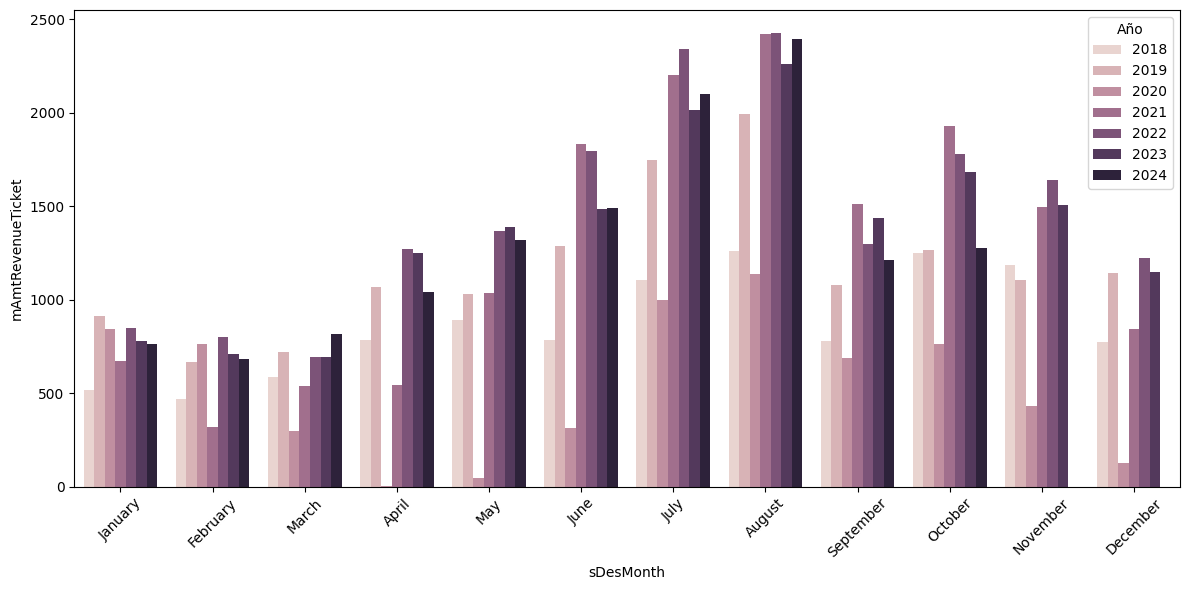

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=season_revenue, x='sDesMonth', y='mAmtRevenueTicket', hue='iNumYear', ci=None)
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

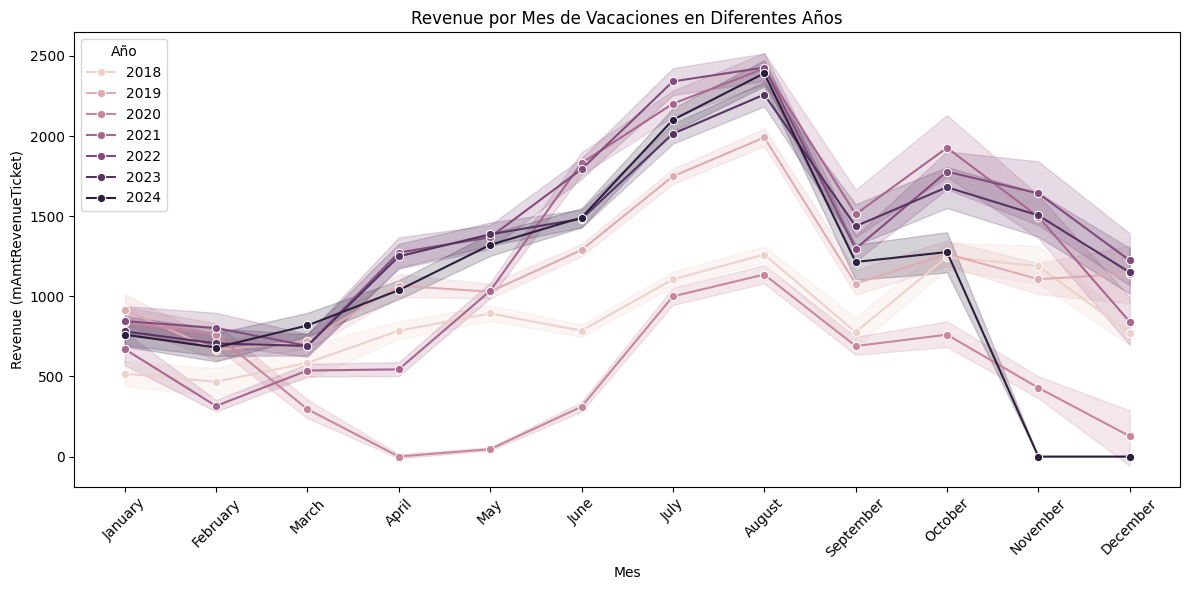

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=season_revenue, x='sDesMonth', y='mAmtRevenueTicket', hue='iNumYear', marker='o')
plt.title('Revenue por Mes de Vacaciones en Diferentes Años')
plt.xlabel('Mes')
plt.ylabel('Revenue (mAmtRevenueTicket)')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. **Impact of the Day of the Week on Visits and Ticket Types Sold:** <br>
Hypothesis: Weekends attract more visitors and drive single-day ticket sales, while weekdays have higher sales of annual or multi-day passes.

In [13]:
'''Necesitamos añadir a qué tipo de ticket se refiere el 'iIdTicketType' para ver 
la correlación entre días de la semana y tipos de ticket además de las ventas'''

tickettype = pd.read_csv('Data/visits_data/dim_ticket_type.csv')
tickettype

,iIdTicketType,sCodTicketType,sDesTicketType,sDesTicketTypeSPA,sCodSource,dLoad,dUpdate
0,-1,-1,Dummy,Dummy,-1,2024-05-14T13:28:23.000+0000,2024-05-14T13:28:23.000+0000
1,4,1,ADULT,ADULTO,Others,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
2,5,2,CHILD,NIÑO,Others,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
3,6,3,OTHER,OTRO,Others,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
4,1,1,ADULTO,ADULTO,BonoParques,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
5,2,2,INFANTIL,INFANTIL,BonoParques,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
6,3,3,SENIOR,SENIOR,BonoParques,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000


In [14]:
visits.shape

(2125194, 13)

In [15]:
visits = pd.merge(visits,tickettype[['iIdTicketType', 'sDesTicketType','sDesTicketTypeSPA', 'sCodSource']],on='iIdTicketType',how='left')
visits

,iIdCalendar,iIdSubPark,iIdSubChannel,iIdTicketType,iIdCurrency,iNumVisits,mNumTicket,mAmtRevenueTicket,iNumYear,sDesMonth,iNumMonth,sDayWeek,sDesQuarterYearUsa,sDesTicketType,sDesTicketTypeSPA,sCodSource
0,20180102,1,1204,6,201801034,0.00,0.00,-491.45,2018,January,1,Tuesday,2018Q1,OTHER,OTRO,Others
1,20180104,49,102,4,201801044,NaN,NaN,0.00,2018,January,1,Thursday,2018Q1,ADULT,ADULTO,Others
2,20180105,37,1203,6,201801033,0.00,0.00,0.00,2018,January,1,Friday,2018Q1,OTHER,OTRO,Others
3,20180107,40,404,4,201801054,NaN,NaN,0.00,2018,January,1,Sunday,2018Q1,ADULT,ADULTO,Others
4,20180119,14,416,4,201801034,0.00,114.00,"6,971.90",2018,January,1,Friday,2018Q1,ADULT,ADULTO,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125189,20241013,1,501,4,202410034,107.00,0.00,"2,227.22",2024,October,10,Sunday,2024Q4,ADULT,ADULTO,Others
2125190,20241016,29,1203,4,202410034,275.00,0.00,"28,547.47",2024,October,10,Wednesday,2024Q4,ADULT,ADULTO,Others
2125191,20241021,820,101,6,202410001,30.00,0.00,"1,358.37",2024,October,10,Monday,2024Q4,OTHER,OTRO,Others
2125192,20241023,16,425,6,202410034,0.00,0.00,0.15,2024,October,10,Wednesday,2024Q4,OTHER,OTRO,Others


In [16]:
visits.shape

(2125194, 16)

In [17]:
day_revenue = visits[['iNumYear', 'sDayWeek', 'mAmtRevenueTicket', 'mNumTicket', 'sDesTicketType']]
day_revenue['sDesTicketType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2125194 entries, 0 to 2125193
Series name: sDesTicketType
Non-Null Count    Dtype 
--------------    ----- 
2125194 non-null  object
dtypes: object(1)
memory usage: 16.2+ MB


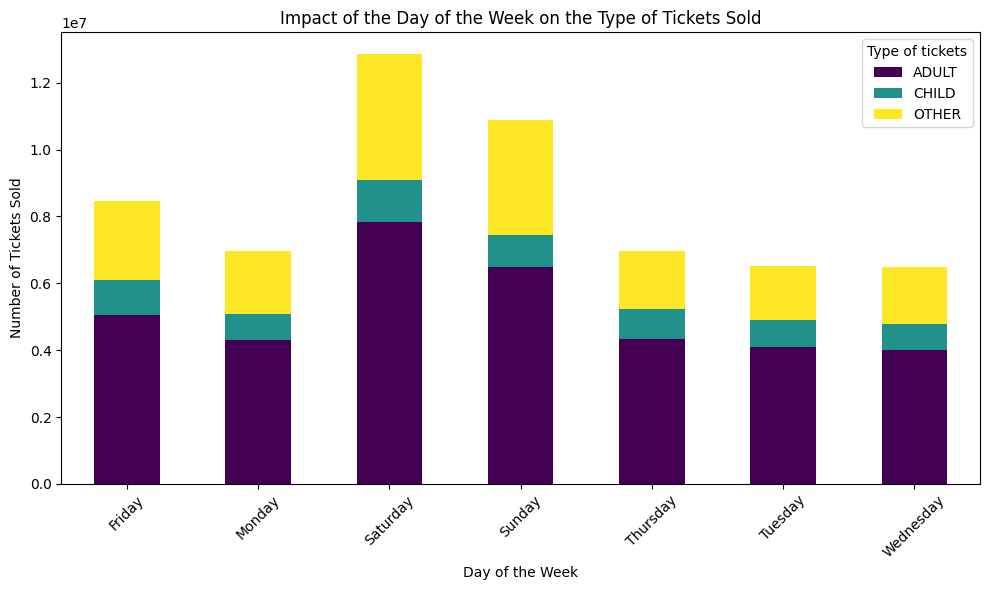

In [18]:
ticket_counts = day_revenue.pivot_table(index='sDayWeek', columns='sDesTicketType', values='mNumTicket', aggfunc='sum', fill_value=0)

ticket_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Impact of the Day of the Week on the Type of Tickets Sold')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.legend(title='Type of tickets')
plt.tight_layout()
plt.show()

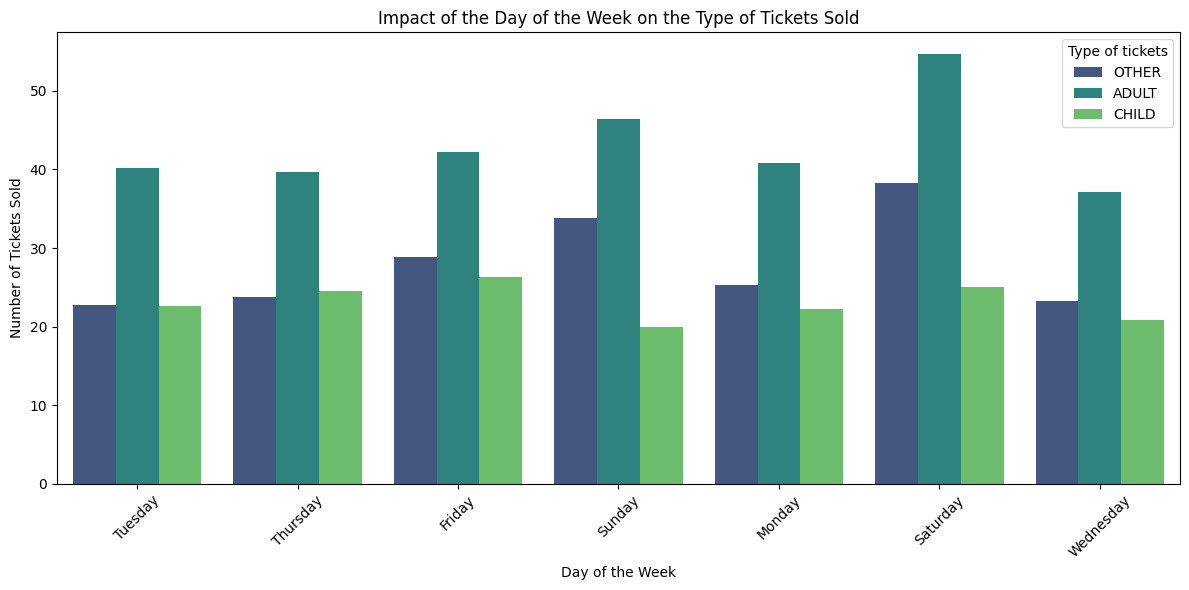

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day_revenue, x='sDayWeek', y='mNumTicket', hue='sDesTicketType',errorbar=None, palette='viridis')

plt.title('Impact of the Day of the Week on the Type of Tickets Sold')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.legend(title='Type of tickets')
plt.tight_layout()
plt.show()

3. **Relationship Between Ticket Price and Revenue by Ticket Type:** <br>
Hypothesis: Higher-priced tickets (such as annual passes) contribute more to revenue despite being sold in lower quantities.

In [20]:
pd.options.display.float_format = '{:,.2f}'.format

In [21]:
ticket_summary = visits.groupby('sDesTicketType').agg(totalRevenue=('mAmtRevenueTicket', 'sum'),quantitySold=('mNumTicket', 'sum')).reset_index()
ticket_summary

,sDesTicketType,totalRevenue,quantitySold
0,ADULT,"2,042,496,463.47","36,104,473.58"
1,CHILD,"190,929,252.95","6,493,545.00"
2,OTHER,"577,105,625.12","16,548,065.25"


/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/2212141794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ticket_summary, x='sDesTicketType', y='totalRevenue', palette='viridis', ax=ax1,label='Total Revenue')


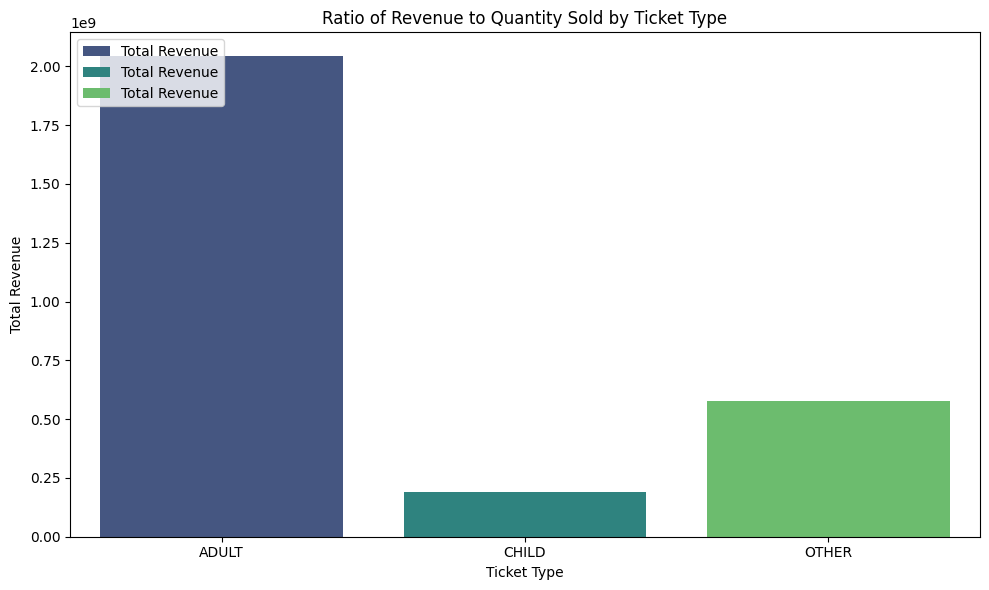

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=ticket_summary, x='sDesTicketType', y='totalRevenue', palette='viridis', ax=ax1,label='Total Revenue')
ax1.set_title('Ratio of Revenue to Quantity Sold by Ticket Type')
ax1.set_xlabel('Ticket Type')
ax1.set_ylabel('Total Revenue')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [23]:
'''¿Qué son OTHERS? En la parte 'sDesTicketTypeSPA' aparecen como si fueran Seniors'''

"¿Qué son OTHERS? En la parte 'sDesTicketTypeSPA' aparecen como si fueran Seniors"

4. **Correlation Between Weather Conditions and Visits to Certain Types of Parks (e.g., Aquaparks vs. Amusement Parks):** <br>
Hypothesis: Weather conditions significantly impact visits to water parks, especially in hot months.


In [24]:
parks = pd.read_csv('Data/visits_data/dim_subpark.csv')
len(parks['sDesSubPark'].unique())

177

In [25]:
parks.columns

Index(['iIdSubPark', 'sCodSubPark', 'sCodSubParkWorkDay', 'sDesSubPark',
       'sDesSubParkEsp', 'sDesSubParkWorkDay', 'sCodPark', 'sDesPark',
       'sCodTypePark', 'sDesTypePark', 'sCodCountry', 'sDesCountry', 'sCodHub',
       'sDesHub', 'sCodRegion', 'sDesRegion', 'dProForma',
       'iCodParnetshipType', 'sCodConsejo', 'sCodConsejoBI', 'sCodPQR',
       'sCodSubParkVOSF', 'sCodSubParkSF', 'sCodSubParkVector',
       'sCodSubParkIACPOS', 'sCodSubParkAxaptaGreg', 'sCodSubParkGreg',
       'bIndBAccounting', 'bIndTickChannel', 'sCodNomenclature',
       'bIndBApplyCPDV', 'sCodDivision', 'sCodPartnership', 'sDesSegment',
       'bEnabled', 'dLoad', 'dUpdate', 'sDesRegion_correct',
       'sCodRegion_correct'],
      dtype='object')

In [26]:
parks = parks[['iIdSubPark', 'sDesSubPark','sDesSubParkEsp','sDesSubParkWorkDay', 'sDesPark', 'sDesTypePark', 'sDesCountry', 'sDesRegion_correct']]
parks

,iIdSubPark,sDesSubPark,sDesSubParkEsp,sDesSubParkWorkDay,sDesPark,sDesTypePark,sDesCountry,sDesRegion_correct
0,-1,Dummy,Dummy,Dummy,Dummy,Dummy,Dummy,Dummy
1,1,Parque Atracciones,Parque Atracciones,Parque Atracciones,Parque Atracciones,Amusement Parks,Spain,EUR
2,2,Teleférico de Madrid,Teleférico de Madrid,NaN,Teleférico de Madrid,Cable Cars,Spain,EUR
3,3,Centaur Spain Two,Centaur Spain Two,Centaur Spain Two,Centaur Spain Two,NaN,Spain,NaN
4,4,Centaur Spain Bidco,Centaur Spain Bidco,NaN,Centaur Spain Bidco,NaN,Spain,NaN
...,...,...,...,...,...,...,...,...
172,939,Centaur Italy 1,Centaur Italy 1,Centaur Italy 1,Centaur Holding Italy 1,NaN,Italy,NaN
173,953,Centaur Denmark 1,Centaur Denmark 1,Centaur Denmark 1,Centaur Denmark 1,NaN,Denmark,NaN
174,964,Centaur Holding Germany,Centaur Holding Germany,Centaur Holding Germany,Centaur Holding Germany,NaN,Germany,NaN
175,965,Movie Park Holidays,Movie Park Holidays,Movie Park Holidays,MoviePark Holidays,Travelparks,Germany,EUR


In [27]:
visits.shape

(2125194, 16)

In [28]:
visits = pd.merge( parks[['iIdSubPark', 'sDesSubPark', 'sDesCountry', 'sDesRegion_correct', 'sDesTypePark']], visits, on='iIdSubPark', how='left')
visits


,iIdSubPark,sDesSubPark,sDesCountry,sDesRegion_correct,sDesTypePark,iIdCalendar,iIdSubChannel,iIdTicketType,iIdCurrency,iNumVisits,mNumTicket,mAmtRevenueTicket,iNumYear,sDesMonth,iNumMonth,sDayWeek,sDesQuarterYearUsa,sDesTicketType,sDesTicketTypeSPA,sCodSource
0,-1,Dummy,Dummy,Dummy,Dummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Parque Atracciones,Spain,EUR,Amusement Parks,"20,180,102.00","1,204.00",6.00,"201,801,034.00",0.00,0.00,-491.45,"2,018.00",January,1.00,Tuesday,2018Q1,OTHER,OTRO,Others
2,1,Parque Atracciones,Spain,EUR,Amusement Parks,"20,180,422.00",701.00,4.00,"201,804,034.00",74.00,74.00,"1,124.63","2,018.00",April,4.00,Sunday,2018Q2,ADULT,ADULTO,Others
3,1,Parque Atracciones,Spain,EUR,Amusement Parks,"20,180,502.00",102.00,5.00,"201,805,034.00",17.00,17.00,332.98,"2,018.00",May,5.00,Wednesday,2018Q2,CHILD,NIÑO,Others
4,1,Parque Atracciones,Spain,EUR,Amusement Parks,"20,180,507.00","1,203.00",6.00,"201,805,034.00",0.00,0.00,0.00,"2,018.00",May,5.00,Monday,2018Q2,OTHER,OTRO,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125293,939,Centaur Italy 1,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2125294,953,Centaur Denmark 1,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2125295,964,Centaur Holding Germany,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2125296,965,Movie Park Holidays,Germany,EUR,Travelparks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
visits.shape

(2125298, 20)

In [30]:
'''Primero vamos a agrupar los datos por mes y tipo de parque'''

monthly_visits_parktype = visits.groupby(['sDesTypePark', 'sDesMonth']).agg(totalVisits = ('mNumTicket', 'sum')).reset_index()
monthly_visits_parktype

,sDesTypePark,sDesMonth,totalVisits
0,Amusement Parks,April,"1,795,502.34"
1,Amusement Parks,August,"7,390,996.03"
2,Amusement Parks,December,"1,156,608.10"
3,Amusement Parks,February,"356,209.20"
4,Amusement Parks,January,"310,902.46"
...,...,...,...
81,Zoological Parks,March,"848,543.79"
82,Zoological Parks,May,"1,174,478.99"
83,Zoological Parks,November,"607,746.68"
84,Zoological Parks,October,"848,666.00"


In [31]:
monthly_visits_parktype['sDesTypePark'].unique()

array(['Amusement Parks', 'Cable Cars', 'Central de bonos', 'FEC', 'MEC',
       'Travelparks', 'Water Parks', 'Zoological Parks'], dtype=object)

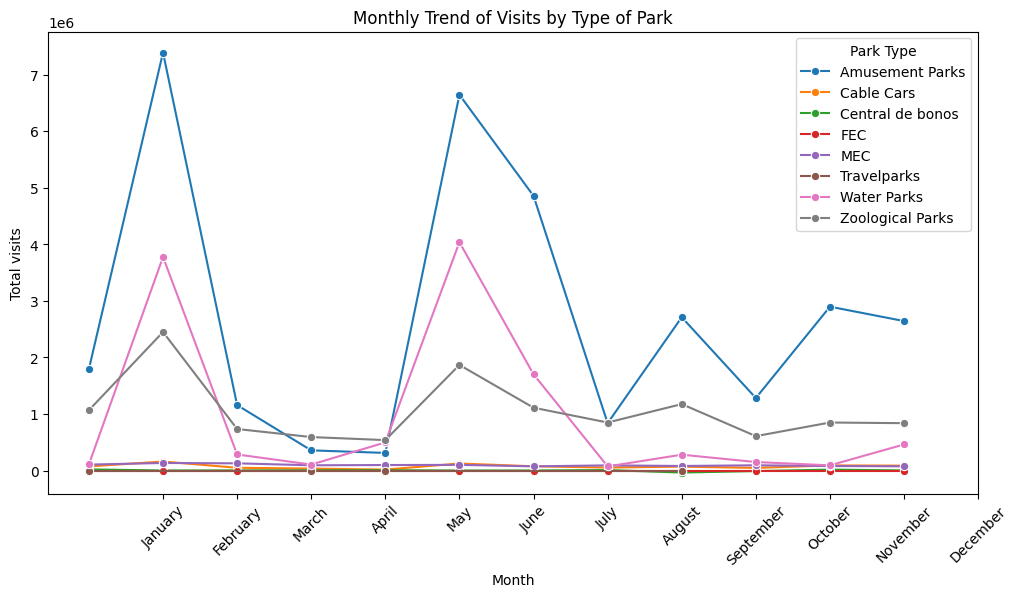

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_visits_parktype, x='sDesMonth', y='totalVisits', hue='sDesTypePark', marker='o')
plt.title('Monthly Trend of Visits by Type of Park')
plt.xlabel('Month')
plt.ylabel('Total visits')
plt.xticks(rotation=45)
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend(title='Park Type')
plt.show()

In [33]:
monthly_visits_country = visits.groupby(['sDesCountry', 'sDesTypePark', 'sDesMonth']).agg(totalVisits=('mNumTicket', 'sum')).reset_index()
monthly_visits_country

,sDesCountry,sDesTypePark,sDesMonth,totalVisits
0,Argentina,Zoological Parks,April,"3,444.00"
1,Argentina,Zoological Parks,August,"2,772.00"
2,Argentina,Zoological Parks,December,"4,416.00"
3,Argentina,Zoological Parks,February,"27,406.00"
4,Argentina,Zoological Parks,January,"26,943.00"
...,...,...,...,...
297,United Kingdom,Zoological Parks,March,"8,687.00"
298,United Kingdom,Zoological Parks,May,"4,953.00"
299,United Kingdom,Zoological Parks,November,"33,828.00"
300,United Kingdom,Zoological Parks,October,"6,132.00"


AttributeError: 'FacetGrid' object has no attribute 'suptitle'

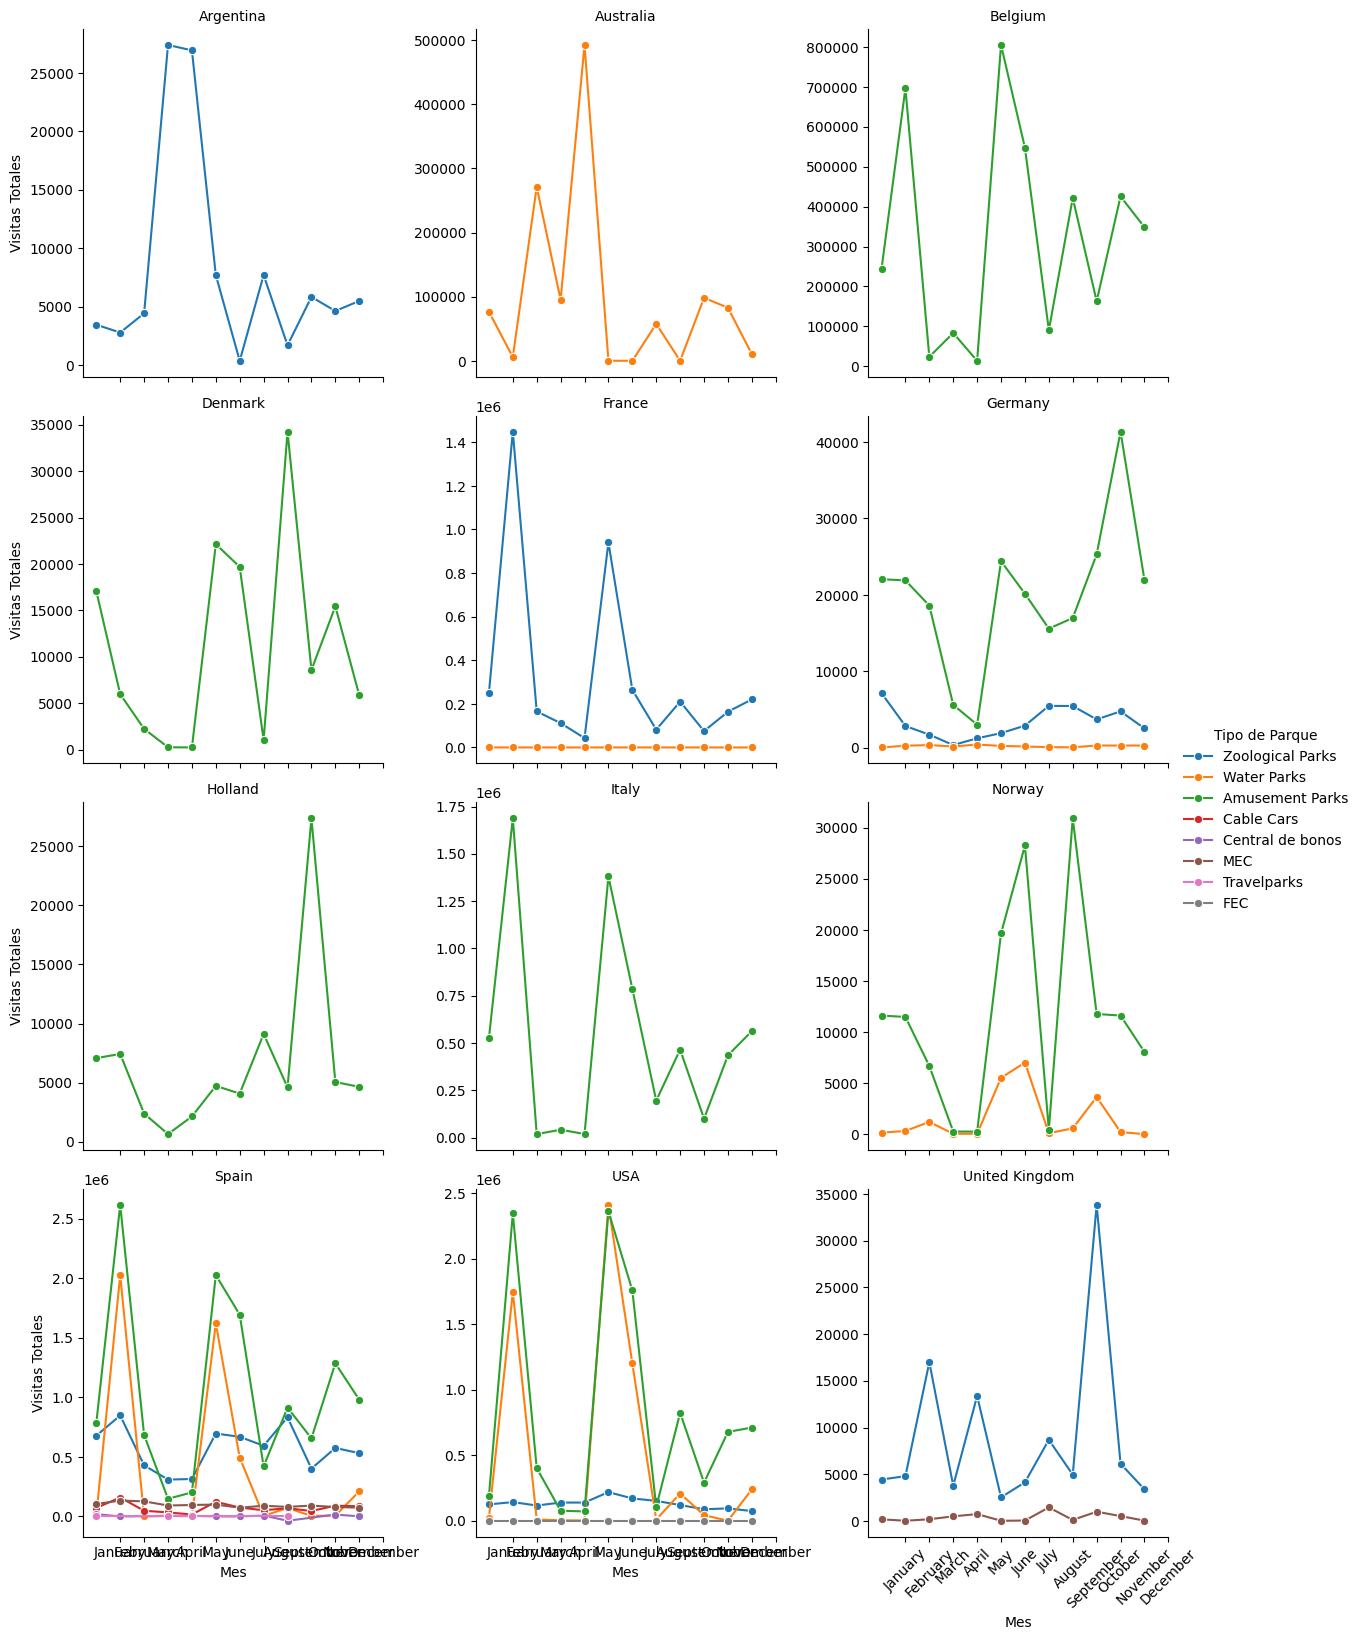

In [34]:
g = sns.FacetGrid(monthly_visits_country, col='sDesCountry', hue='sDesTypePark', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'sDesMonth', 'totalVisits', marker='o')
g.add_legend(title='Tipo de Parque')
g.set_axis_labels('Mes', 'Visitas Totales')
g.set_titles('{col_name}')
plt.xticks(rotation=45)
plt.xticks(ticks=range(1, 13),rotation=45,labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
g.suptitle('Tendencia Mensual de Visitas por Tipo de Parque y Continente', y=1.02)

plt.show()

5. **Evolution of Park Preferences Over the Years:** <br>
Hypothesis: Visitor patterns have shifted between 2018 and 2023, showing increased preference for certain types of parks (e.g., possible behavior changes post-pandemic).

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_14347/986669546.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=monthly_visits_country, x='sDesMonth', y='totalVisits', hue='sDesTypePark', palette='viridis', ci=None)


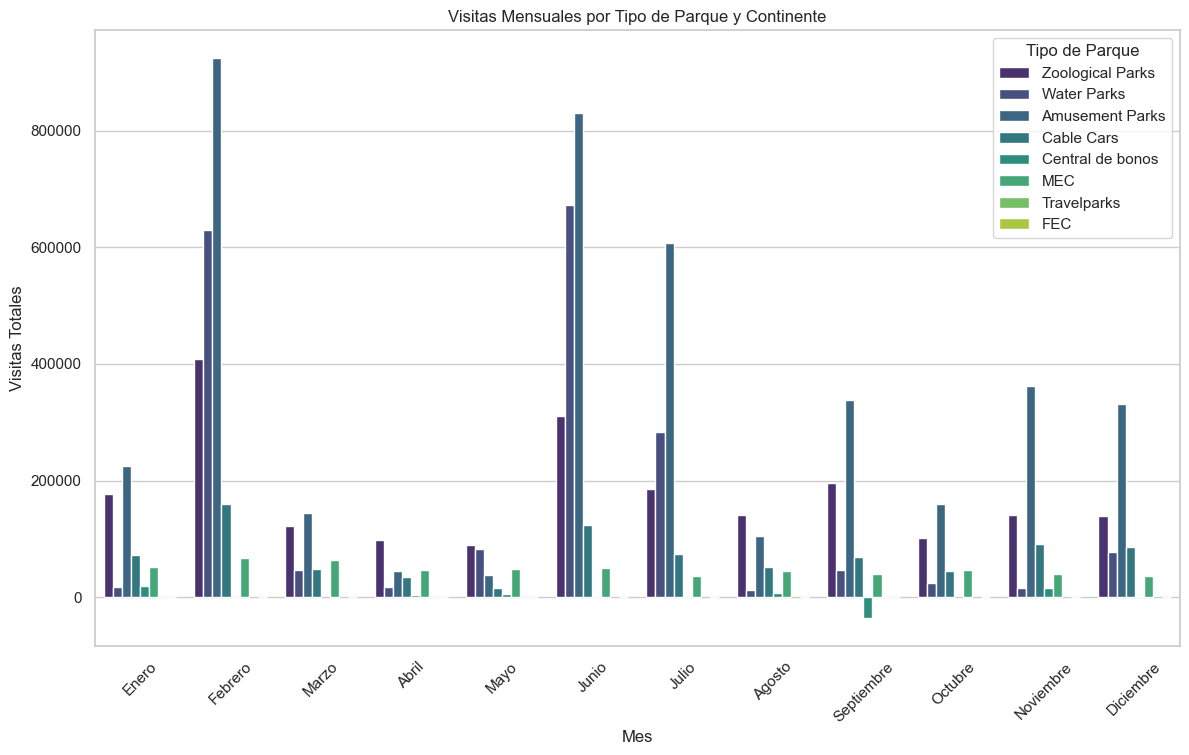

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_visits_country, x='sDesMonth', y='totalVisits', hue='sDesTypePark', palette='viridis', ci=None)

plt.title('Visitas Mensuales por Tipo de Parque y Continente')
plt.xlabel('Mes')
plt.ylabel('Visitas Totales')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend(title='Tipo de Parque')
plt.show()

6. **Influence of Promotions or Events on Visitor Numbers and Revenue:** <br>
Hypothesis: Special promotions or events on certain days increase visitor numbers and revenue.

In [35]:
promotion = pd.read_csv('Data/visits_data/dim_subchannel.csv')
promotion.head(15)

,iIdSubChannel,sCodSubChannel,sDesSubChannel,sDesSubChannelSPA,sCodChannel,sDesChannel,sDesChannelSPA,iCodChannelType,sDesChannelType,sDesChannelTypeSPA,...,sDesOnline,sCodRevenueChannel,sDesRevenueChannel,sCodRevenueSubChannel,sDesRevenueSubChannel,sCodFirstTimeAnnualPass,sDesFirstTimeAnnualPass,bIndEnabled,dLoad,dUpdate
0,1010000,101,Main Gate Full Price,Entrada principal tarifa general,Entrada principal tarifa general,Entrada principal tarifa general,Entrada principal tarifa general,1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
1,1020000,102,Main Gate Rest,Entrada principal resto,Entrada principal resto,Entrada principal resto,Entrada principal resto,1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
2,2010000,201,Internet Full Price,Internet tarifa general,Internet tarifa general,Internet tarifa general,Internet tarifa general,1,Payment Visitors,Visitantes pago,...,On-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
3,2020000,202,Internet Promos,Internet promociones,Internet promociones,Internet promociones,Internet promociones,1,Payment Visitors,Visitantes pago,...,On-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
4,2030000,203,Internet Travelparks,Internet travelparks,Internet travelparks,Internet travelparks,Internet travelparks,1,Payment Visitors,Visitantes pago,...,On-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
5,3010000,301,Promotions More 40% Discount,Promociones con mas del 40% de descuento,Promociones con mas del 40% de descuento,Promociones con mas del 40% de descuento,Promociones con mas del 40% de descuento,1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
6,3020000,302,Promotions 25% to 39% Discount,Promociones entre el 25% y el 39% de descuento,Promociones entre el 25% y el 39% de descuento,Promociones entre el 25% y el 39% de descuento,Promociones entre el 25% y el 39% de descuento,1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
7,3030000,303,Promotions Bellow 25% Discount,Promociones por debajo del 25% de descuento,Promociones por debajo del 25% de descuento,Promociones por debajo del 25% de descuento,Promociones por debajo del 25% de descuento,1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
8,4010000,401,Annual Pass New (Offline),Pase anual nuevo (offline),Pase anual nuevo (offline),Pase anual nuevo (offline),Pase anual nuevo (offline),1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000
9,4020000,402,Annual Pass Renew (Offline),Pase anual renovacion (offline),Pase anual renovacion (offline),Pase anual renovacion (offline),Pase anual renovacion (offline),1,Payment Visitors,Visitantes pago,...,Off-line,NaN,NaN,NaN,NaN,NaN,NaN,False,2024-05-14T13:28:23.000+0000,2024-10-25T06:31:40.000+0000


In [36]:
visits.shape

(2125298, 20)

In [37]:
visits = pd.merge( promotion[['iIdSubChannel', 'sDesSubChannel', 'sCodChannel', 'sDesOnline', 'sDesBudget' ]], visits, on='iIdSubChannel', how='left')
visits.tail(15)

,iIdSubChannel,sDesSubChannel,sCodChannel,sDesOnline,sDesBudget,iIdSubPark,sDesSubPark,sDesCountry,sDesRegion_correct,sDesTypePark,...,mNumTicket,mAmtRevenueTicket,iNumYear,sDesMonth,iNumMonth,sDayWeek,sDesQuarterYearUsa,sDesTicketType,sDesTicketTypeSPA,sCodSource
2125223,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,022.00",July,7.00,Sunday,2022Q3,ADULT,ADULTO,Others
2125224,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,021.00",April,4.00,Friday,2021Q2,ADULT,ADULTO,Others
2125225,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,021.00",September,9.00,Sunday,2021Q3,ADULT,ADULTO,Others
2125226,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,022.00",May,5.00,Sunday,2022Q2,ADULT,ADULTO,Others
2125227,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,021.00",October,10.00,Sunday,2021Q4,OTHER,OTRO,Others
2125228,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,021.00",October,10.00,Saturday,2021Q4,ADULT,ADULTO,Others
2125229,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,022.00",July,7.00,Saturday,2022Q3,OTHER,OTRO,Others
2125230,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,021.00",September,9.00,Wednesday,2021Q3,ADULT,ADULTO,Others
2125231,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,022.00",August,8.00,Saturday,2022Q3,OTHER,OTRO,Others
2125232,423,Annual Pass Complements - Platinum,04,Off-line,Annual Pass Complements,203.00,MEC Acuario Xanadú,Spain,EUR,MEC,...,0.00,0.00,"2,021.00",November,11.00,Saturday,2021Q4,ADULT,ADULTO,Others


In [38]:
visits.shape

(2125238, 24)

In [39]:
promotion_analysis = visits.groupby('sDesSubChannel').agg(totalVisits=('mNumTicket', 'sum'),totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()
promotion_analysis

,sDesSubChannel,totalVisits,totalRevenue
0,Annual Pass Complements - Basic,"107,166.00","330,882.81"
1,Annual Pass Complements - Platinum,1.00,"6,634.41"
2,Annual Pass Complements - Premium,96.00,"303,851.95"
3,Annual Pass Complements - Standard,111.00,"373,259.63"
4,Annual Pass Internet (All),0.00,0.00
...,...,...,...
110,Travel Agents Off-line Platforms,"1,414,860.00","25,747,470.20"
111,Travel Agents On-line Platforms,"1,724,382.26","60,939,773.02"
112,TravelParks,"1,211,565.00","35,022,884.11"
113,Web (non promotional codes),"10,928,158.00","700,760,505.78"


In [40]:
promotion_analysis['sDesSubChannel'].unique()

array(['Annual Pass Complements - Basic',
       'Annual Pass Complements - Platinum',
       'Annual Pass Complements - Premium',
       'Annual Pass Complements - Standard', 'Annual Pass Internet (All)',
       'Annual Pass Internet Diver', 'Annual Pass Internet Multi',
       'Annual Pass Internet Park', 'Annual Pass Internet Super',
       'Annual Pass New (Offline)', 'Annual Pass New Diver',
       'Annual Pass New Multi', 'Annual Pass New Off-line - Basic',
       'Annual Pass New Off-line - Bronze',
       'Annual Pass New Off-line - Gold',
       'Annual Pass New Off-line - Platino',
       'Annual Pass New Off-line - Platinum',
       'Annual Pass New Off-line - Premium',
       'Annual Pass New Off-line - Silver',
       'Annual Pass New Off-line - Standard',
       'Annual Pass New On-line - Basic',
       'Annual Pass New On-line - Bronze',
       'Annual Pass New On-line - Gold',
       'Annual Pass New On-line - Platino',
       'Annual Pass New On-line - Platinum',
     

Tenemos tantas categorías que no podemos visualizar de una forma clara 
la información, por eso vamos a crear categorías Principales:

Podemos definir categorías basadas en términos recurrentes en los nombres de los bonos y pases. 
Aquí tienes algunas sugerencias de categorías, basadas en la lista que compartiste:

**Annual Pass:** Incluye todos los tipos de pases anuales (ej. "Annual Pass", "Bronze Annual Pass", "Gold Annual Pass"). <br>
**Collectives:** Incluye todo lo que contenga "Collectives" (ej. "Collectives Credits", "Collectives Presales"). <br>
**Promotions:** Incluye todos los descuentos y promociones (ej. "Promotions - 25% to 39% Discount", "Promotions More 40% Discount"). <br>
**School:** Para actividades relacionadas con instituciones educativas (ej. "School"). <br>
**Flash Sales & Events:** Agrupa "Flash Sales" y "Events". <br>
**Speedy Pass:** Incluye las variantes de "Speedy Pass". <br>
**Travel Agents:** Agrupa tipos de pases y promociones de agencias de viajes (ej. "Travel Agents Off-line Platforms"). <br>
**Main Gate & Web:** Incluye "Main Gate" y variantes de "Web". <br>
**Otros/Rest:** Agrupa los pases de categorías menores o con nombres ambiguos (ej. "Others", "Second Day Free"). <br>

In [41]:
conditions = [
    visits['sDesSubChannel'].str.contains('Annual Pass', case=False),
    visits['sDesSubChannel'].str.contains('Collectives', case=False),
    visits['sDesSubChannel'].str.contains('Promotion', case=False),
    visits['sDesSubChannel'].str.contains('School', case=False),
    visits['sDesSubChannel'].str.contains('Flash Sales|Events', case=False),
    visits['sDesSubChannel'].str.contains('Speedy pass', case=False),
    visits['sDesSubChannel'].str.contains('Travel Agents', case=False),
    visits['sDesSubChannel'].str.contains('Main Gate|Web', case=False),
    visits['sDesSubChannel'].str.contains('Others|Rest|Second Day Free', case=False)
]

categories = [
    'Annual Pass',
    'Collectives',
    'Promotions',
    'School',
    'Flash Sales & Events',
    'Speedy Pass',
    'Travel Agents',
    'Main Gate & Web',
    'Otros/Rest'
]

In [42]:
visits['PromotionCategory'] = np.select(conditions, categories, default='Unknown')

# Crear el DataFrame de revenue_data agrupando por categoría y sumando el total de revenue
revenue_data = visits.groupby('PromotionCategory').agg(totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()

# Ordenar los datos por total de revenue, de mayor a menor
revenue_data = revenue_data.sort_values(by='totalRevenue', ascending=False)

# Configuración del estilo de gráficos
sns.set(style="whitegrid")

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/3022164548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


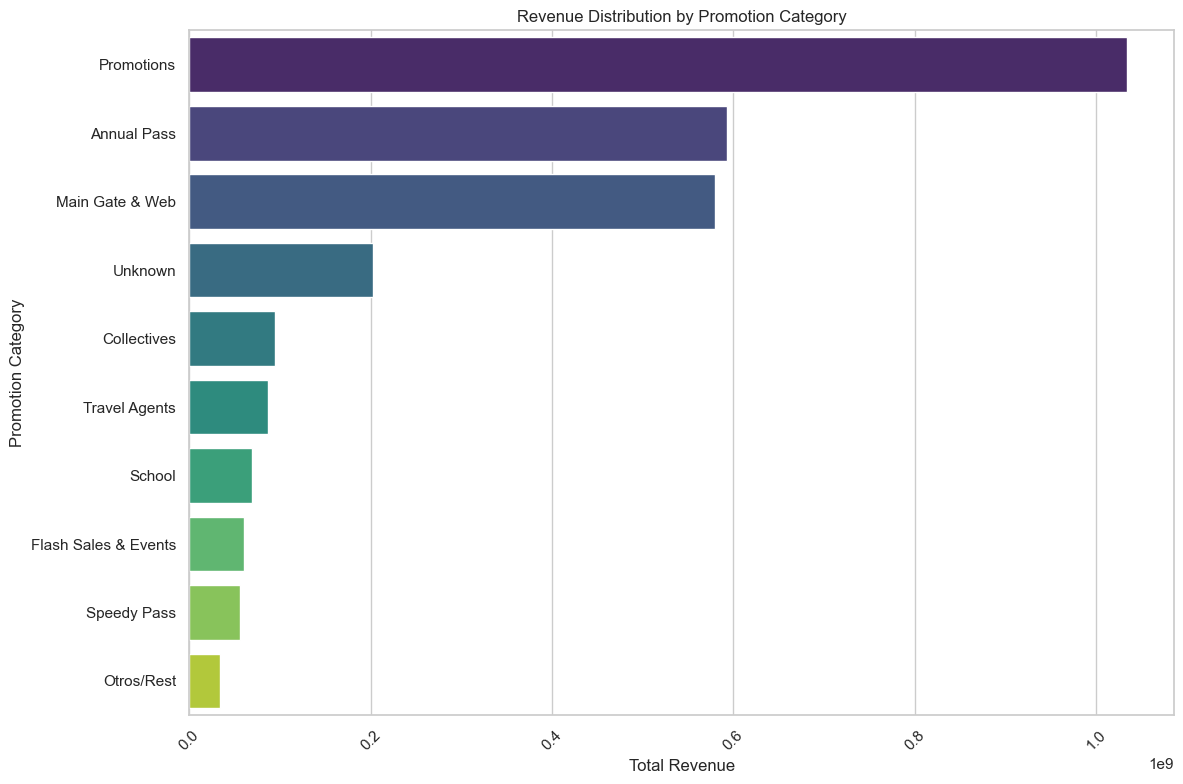

In [43]:
# Configuración de estilo
sns.set(style="whitegrid")

# Ordenar los datos por total de revenue, de mayor a menor, para claridad en el gráfico
revenue_data = revenue_data.sort_values(by='totalRevenue', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    x='totalRevenue', 
    y='PromotionCategory', 
    data=revenue_data, 
    palette="viridis"
)

# Configurar etiquetas y título
plt.xlabel('Total Revenue')
plt.ylabel('Promotion Category')
plt.title('Revenue Distribution by Promotion Category')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


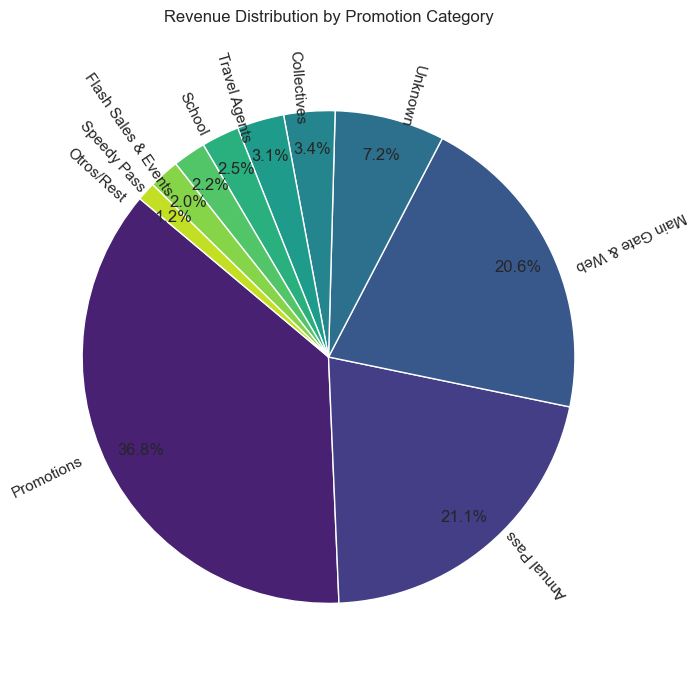

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    revenue_data['totalRevenue'], 
    labels=revenue_data['PromotionCategory'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(revenue_data)),
    pctdistance=0.85,
    labeldistance=1.1
)

# Rotar las etiquetas hacia afuera del gráfico
for text, wedge in zip(texts, wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = np.cos(np.radians(angle))
    y = np.sin(np.radians(angle))
    # Ajustar alineación y ángulo para cada etiqueta
    ha = "left" if x > 0 else "right"
    text.set_horizontalalignment(ha)
    text.set_rotation(angle if angle < 180 else angle - 180)

# Configurar el título
plt.title('Revenue Distribution by Promotion Category', pad=20)

# Mostrar el gráfico
plt.show()


7. **Comparison of Parks Based on Economic Performance:** <br>
Hypothesis: Significant differences exist in the revenue generated by each park, based on their popularity and location.

In [45]:
'''Vamos a ver qué países son los que más beneficio nos dan'''
countries_total_revenue = visits.groupby('sDesCountry').agg(totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()
countries_total_revenue = countries_total_revenue.sort_values(by='totalRevenue', ascending=False)

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/2385309926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries_total_revenue, x='totalRevenue', y='sDesCountry', palette='viridis')


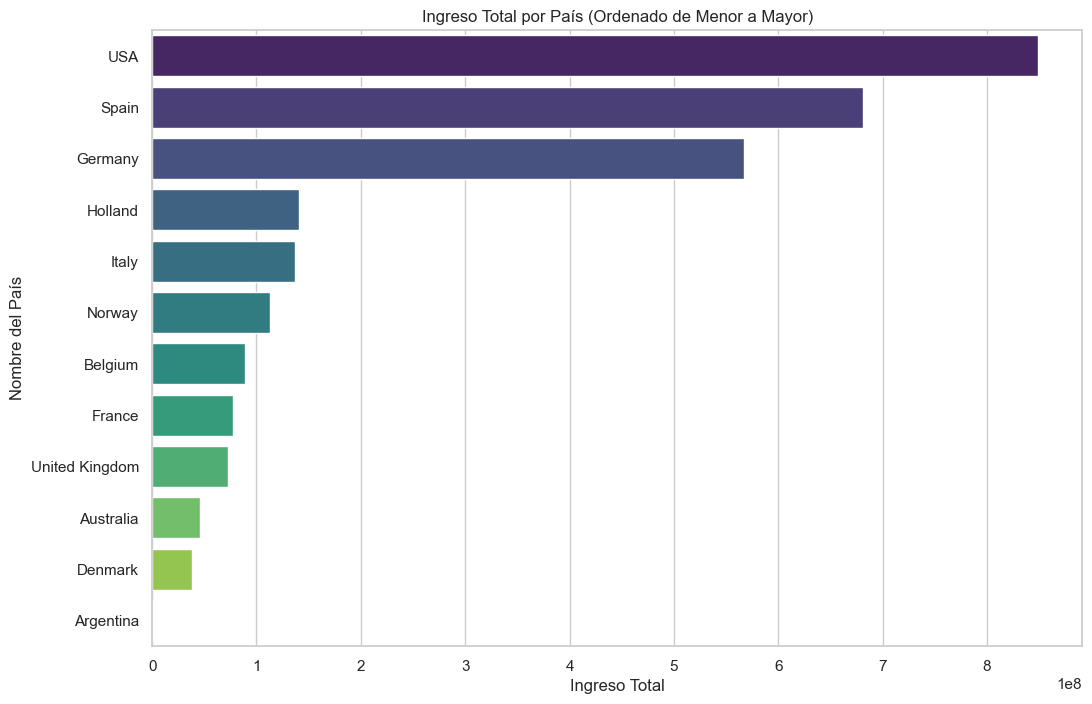

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(data=countries_total_revenue, x='totalRevenue', y='sDesCountry', palette='viridis')
plt.title('Ingreso Total por País (Ordenado de Menor a Mayor)')
plt.xlabel('Ingreso Total')
plt.ylabel('Nombre del País')
plt.show()

In [47]:
'''Vamos a crear una tabla donde vamos a poder ver muy fácilmente cada parque que hay en cada país'''

country_parks_resume = visits.groupby(['sDesCountry', 'sDesSubPark']).agg(totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()
country_parks_resume = country_parks_resume.sort_values(by=['sDesCountry', 'totalRevenue'], ascending=[True, False])
country_parks_resume

,sDesCountry,sDesSubPark,totalRevenue
0,Argentina,Mar de Plata,"849,978.44"
1,Australia,Wet & Wild - Sydney,"45,767,258.80"
2,Belgium,Bobbejaanland,"88,845,263.43"
3,Denmark,Bonbonland,"38,059,371.75"
8,France,Marineland,"49,122,031.96"
...,...,...,...
46,USA,Continental Hotel,-785.33
70,United Kingdom,Blackpool Zoo,"49,439,606.43"
71,United Kingdom,Bournemouth Oceanarium,"14,444,006.40"
72,United Kingdom,MEC Lakeside,"4,589,127.40"


In [48]:
'''Aquí podemos ver la cantidad de parques de cada país, el orden de éxito de cada uno de ellos y el ingreso que han creado en los últimos años'''
total_revenue_per_country = country_parks_resume.groupby('sDesCountry').agg(totalCountryRevenue=('totalRevenue', 'sum')).reset_index()
total_revenue_per_country = total_revenue_per_country.sort_values(by='totalCountryRevenue', ascending=False)
country_parks_resume = country_parks_resume.sort_values(by=['sDesCountry', 'totalRevenue'], ascending=[True, False])

print("Total Revenue per Country:")
print(total_revenue_per_country)

print("\nParks Revenue by Country:")
for country in total_revenue_per_country['sDesCountry']:
    print(f"\n{country} (Total Revenue: {total_revenue_per_country[total_revenue_per_country['sDesCountry'] == country]['totalCountryRevenue'].values[0]:,.0f})")
    country_parks = country_parks_resume[country_parks_resume['sDesCountry'] == country]
    for _, row in country_parks.iterrows():
        print(f"  - {row['sDesSubPark']}: {row['totalRevenue']:,.0f}")

Total Revenue per Country:
       sDesCountry  totalCountryRevenue
10             USA       848,671,901.68
9            Spain       680,806,313.46
5          Germany       567,074,361.35
6          Holland       140,709,863.89
7            Italy       137,365,962.51
8           Norway       112,682,232.62
2          Belgium        88,845,263.43
4           France        77,110,195.40
11  United Kingdom        72,588,638.21
1        Australia        45,767,258.80
3          Denmark        38,059,371.75
0        Argentina           849,978.44

Parks Revenue by Country:

USA (Total Revenue: 848,671,902)
  - Kennywood: 147,712,185
  - Splish Splash: 88,962,815
  - Lake Compounce Park: 82,066,395
  - Los Angeles: 69,043,243
  - Dutch Wonderland Park: 63,431,148
  - Adventureland Park: 56,968,758
  - Story Land Park: 50,108,510
  - Wet & Wild - Emerald Pointe: 47,110,092
  - Idlewild: 44,343,027
  - Noah's Ark Park: 39,672,344
  - Seaquarium: 35,773,258
  - Water Country: 31,231,178
  - Cast

In [49]:
'''Aquí vamos a analizar cuales son los parques con más éxito'''

parks_performance = visits.groupby(['sDesSubPark', 'sDesCountry']).agg(totalRevenue=('mAmtRevenueTicket', 'sum'),totalTickets=('mNumTicket', 'sum')).reset_index()

In [50]:
parks_performance = parks_performance.sort_values(by='totalRevenue', ascending=False)
parks_performance

,sDesSubPark,sDesCountry,totalRevenue,totalTickets
67,Warner,Spain,"266,516,021.45","7,481,537.60"
62,Tropical Island Lodging,Germany,"213,576,575.85",0.00
42,Movie Park Germany,Germany,"180,597,138.90","147,502.90"
27,Kennywood,USA,"147,712,184.94","3,129,638.00"
41,Mirabilandia,Italy,"126,350,456.84","5,555,632.00"
...,...,...,...,...
29,Lake Compounce Campground,USA,397.54,31.00
45,P. Reunidos Servicios Centrales,Spain,0.00,"16,937.00"
35,MEC Nickelodeon Xanadú,Spain,0.00,0.00
60,Teleférico de Madrid,Spain,-75.09,-14.00


/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/12232849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parks_performance, x='totalRevenue', y='sDesSubPark', palette='viridis')


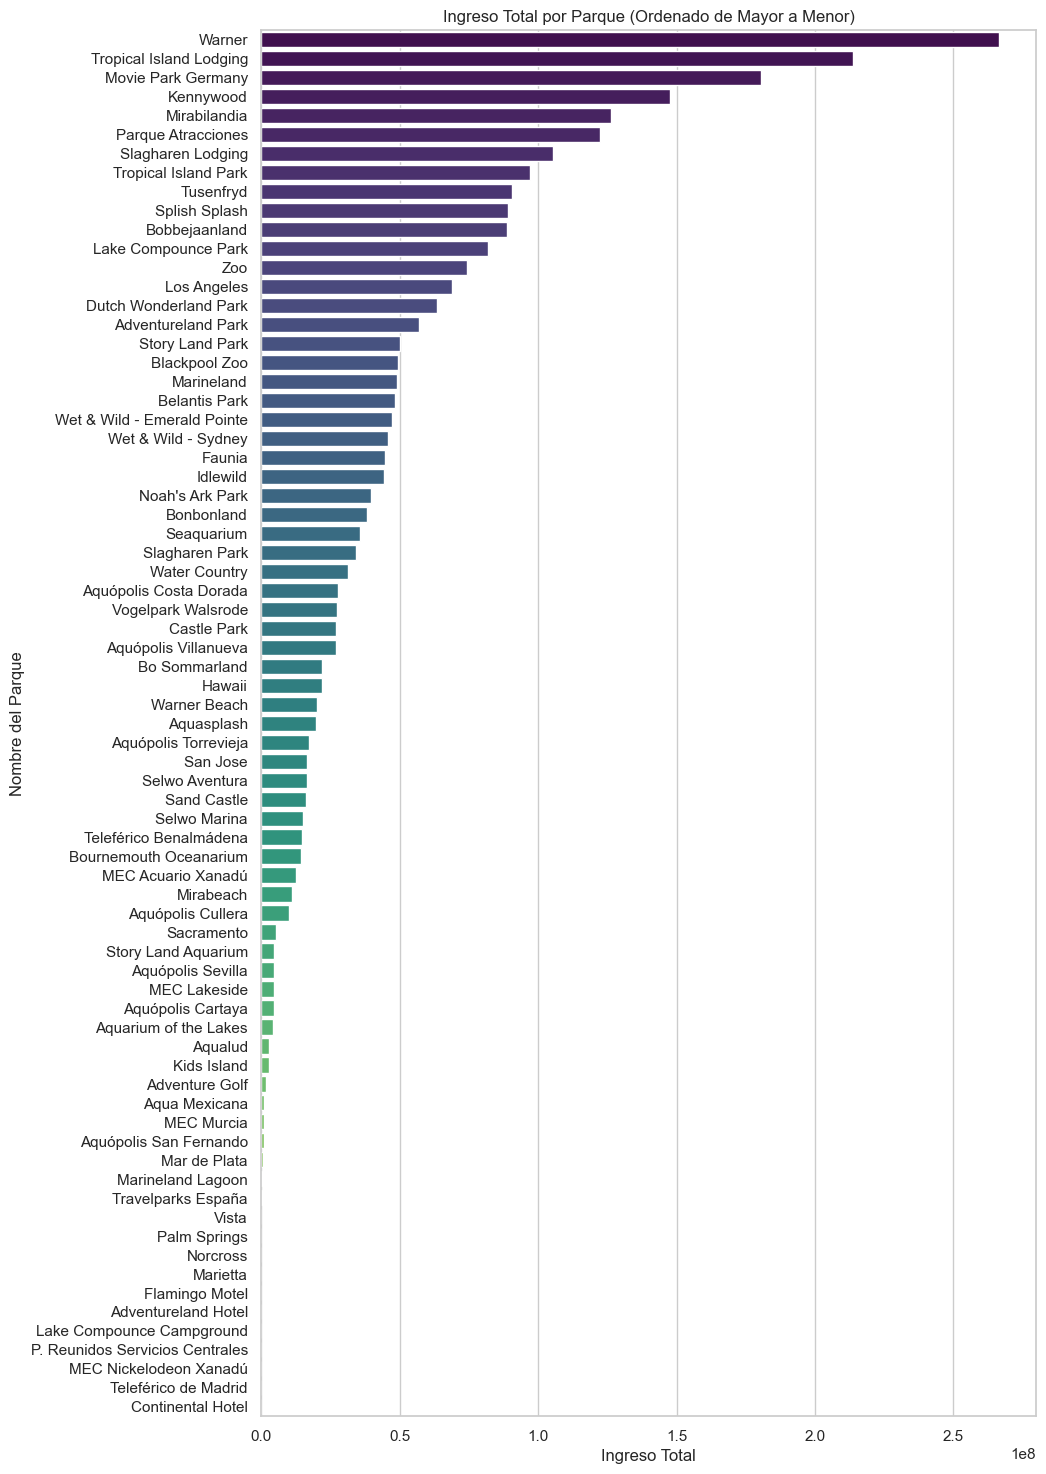

In [51]:
plt.figure(figsize=(10, 18))
sns.barplot(data=parks_performance, x='totalRevenue', y='sDesSubPark', palette='viridis')
plt.title('Ingreso Total por Parque (Ordenado de Mayor a Menor)')
plt.xlabel('Ingreso Total')
plt.ylabel('Nombre del Parque')

plt.show()

8. **Comparison of Online vs. On-Site Ticket Purchases:** <br>
Hypothesis: After COVID-19, online ticket purchases have significantly increased as visitors prefer to plan in advance and avoid on-site queues.

In [52]:
'''Viendo que tenemos 43 filas donde hay muchos valores nulos, he decidido borrarlas, ya que la información que hay no es relevante
con el resto de cantidad de datos que poseemos, y guardar el dataframe final para esta primera parte'''

visits_cleaned = visits.drop(index=visits.index[:44])
visits_cleaned = visits_cleaned.reset_index(drop=True)

'''Guardamos el dataset'''
visits_cleaned.to_csv('visits_cleaned.csv', index=False)
visits_cleaned.head()

,iIdSubChannel,sDesSubChannel,sCodChannel,sDesOnline,sDesBudget,iIdSubPark,sDesSubPark,sDesCountry,sDesRegion_correct,sDesTypePark,...,mAmtRevenueTicket,iNumYear,sDesMonth,iNumMonth,sDayWeek,sDesQuarterYearUsa,sDesTicketType,sDesTicketTypeSPA,sCodSource,PromotionCategory
0,101,Main Gate Full Price,01,Off-line,Main Gate Full Price,1.00,Parque Atracciones,Spain,EUR,Amusement Parks,...,"1,985.30","2,024.00",May,5.00,Friday,2024Q2,ADULT,ADULTO,Others,Main Gate & Web
1,101,Main Gate Full Price,01,Off-line,Main Gate Full Price,1.00,Parque Atracciones,Spain,EUR,Amusement Parks,...,0.00,"2,020.00",March,3.00,Saturday,2020Q1,ADULT,ADULTO,Others,Main Gate & Web
2,101,Main Gate Full Price,01,Off-line,Main Gate Full Price,1.00,Parque Atracciones,Spain,EUR,Amusement Parks,...,"4,305.87","2,023.00",June,6.00,Wednesday,2023Q2,ADULT,ADULTO,Others,Main Gate & Web
3,101,Main Gate Full Price,01,Off-line,Main Gate Full Price,1.00,Parque Atracciones,Spain,EUR,Amusement Parks,...,"2,455.70","2,019.00",September,9.00,Friday,2019Q3,ADULT,ADULTO,Others,Main Gate & Web
4,101,Main Gate Full Price,01,Off-line,Main Gate Full Price,1.00,Parque Atracciones,Spain,EUR,Amusement Parks,...,"9,863.88","2,021.00",July,7.00,Sunday,2021Q3,ADULT,ADULTO,Others,Main Gate & Web


In [53]:
visits['iNumYear']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
2125233   2,022.00
2125234   2,020.00
2125235   2,022.00
2125236   2,022.00
2125237   2,021.00
Name: iNumYear, Length: 2125238, dtype: float64

In [54]:
purchase_comparison = visits.groupby(['iNumYear', 'sDesOnline']).agg(totalVisits=('mNumTicket', 'sum'), totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()

totals_per_year = purchase_comparison.groupby('iNumYear').agg(totalRevenue=('totalRevenue', 'sum'),totalVisits=('totalVisits', 'sum')).reset_index()

purchase_comparison = purchase_comparison.merge(totals_per_year, on='iNumYear', suffixes=('', '_Total'))

purchase_comparison['percentage'] = (purchase_comparison['totalRevenue'] / purchase_comparison['totalRevenue_Total']) * 100

print(purchase_comparison[['iNumYear', 'sDesOnline', 'totalRevenue', 'totalVisits', 'percentage']])


    iNumYear sDesOnline   totalRevenue   totalVisits  percentage
0   2,018.00   Off-line 190,929,332.31  5,268,193.00       66.82
1   2,018.00    On-line  94,801,190.66  2,600,695.51       33.18
2   2,019.00   Off-line 301,738,843.00 10,399,844.00       67.99
3   2,019.00    On-line 142,051,515.71  3,735,936.71       32.01
4   2,020.00   Off-line  68,892,290.21  1,809,657.05       46.20
5   2,020.00    On-line  80,232,596.33  1,829,664.08       53.80
6   2,021.00   Off-line 184,643,967.54  5,274,832.90       45.20
7   2,021.00    On-line 223,894,305.55  4,806,826.41       54.80
8   2,022.00   Off-line 232,628,957.30  6,696,612.00       44.55
9   2,022.00    On-line 289,587,197.58  6,361,740.14       55.45
10  2,023.00   Off-line 250,020,235.59  3,521,950.00       46.63
11  2,023.00    On-line 286,141,553.19  4,512,193.73       53.37
12  2,024.00   Off-line 218,110,916.93  1,128,245.30       46.91
13  2,024.00    On-line 246,858,439.64  1,199,693.00       53.09


In [55]:
purchase_comparison = visits.groupby(['iNumYear', 'sDesOnline']).agg(totalVisits=('mNumTicket', 'sum'),totalRevenue=('mAmtRevenueTicket', 'sum')).reset_index()

totals_per_year = purchase_comparison.groupby('iNumYear').agg(totalRevenue=('totalRevenue', 'sum')).reset_index()

# Unir los totales con el DataFrame original para calcular los porcentajes
purchase_comparison = purchase_comparison.merge(totals_per_year, on='iNumYear', suffixes=('', '_Total'))

# Calcular el porcentaje de cada tipo de compra respecto al total
purchase_comparison['percentage'] = (purchase_comparison['totalRevenue'] / purchase_comparison['totalRevenue_Total']) * 100

# Pivotear los datos para facilitar el cálculo de la diferencia de ingresos
purchase_pivot = purchase_comparison.pivot(index='iNumYear', columns='sDesOnline', values='totalRevenue').fillna(0)

# Calcular la diferencia de ingresos entre Online y Offline por año
purchase_pivot['difference'] = purchase_pivot['On-line'] - purchase_pivot['Off-line']
purchase_pivot = purchase_pivot.reset_index()


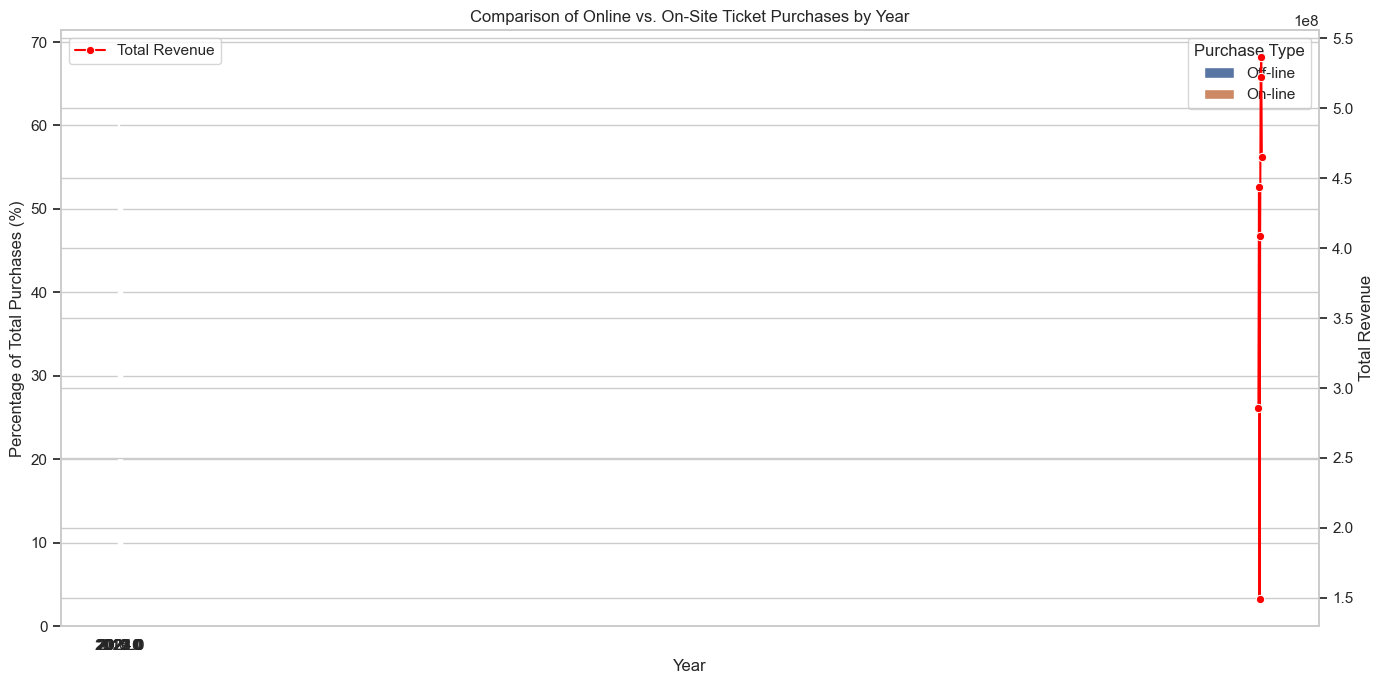

In [56]:
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar los porcentajes de cada tipo de compra
sns.barplot(x='iNumYear', y='percentage', hue='sDesOnline', data=purchase_comparison, ax=ax1)

# Ajustar etiquetas y título del primer eje y
ax1.set_title('Comparison of Online vs. On-Site Ticket Purchases by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Total Purchases (%)')
ax1.legend(title='Purchase Type')

# Crear un segundo eje para el total de revenue
ax2 = ax1.twinx()  # Crear un segundo eje y que comparte el eje x
# Suponiendo que purchase_pivot contiene columnas 'total_revenue_online' y 'total_revenue_offline'
purchase_pivot['totalRevenue'] = purchase_pivot['On-line'] + purchase_pivot['Off-line']
sns.lineplot(x='iNumYear', y='totalRevenue', data=purchase_pivot, marker='o', color='red', ax=ax2, label='Total Revenue')
ax2.set_ylabel('Total Revenue')
ax2.legend(loc='upper left')

# Ajustar diseño y mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Second and Third Data Frame: **<u> Online Sells </u>** <br>
(Order Header Vector and Order Line Vector)

In [ ]:
onlinesells_header = pd.read_csv('Data/paid_media_online_sells/header_online_sells/fact_vector_header.csv')

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_14347/1046455795.py:1: DtypeWarning: Columns (0,6,7,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  onlinesells_header = pd.read_csv('Data/paid_media_online_sells/header_online_sells/fact_vector_header.csv')


In [ ]:
onlinesells_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6753007 entries, 0 to 6753006
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   sCodTransactionCode        object 
 1   iIdTransactionDate         int64  
 2   iIdTransactionHour         int64  
 3   iIdSubPark                 int64  
 4   sCodClub                   float64
 5   iIdPaymentMethod           int64  
 6   sDesCustZipCode            object 
 7   sCodCustCountry            object 
 8   sCodCustPhone              object 
 9   sDesCustEmail              object 
 10  iIdCustBirthDate           int64  
 11  sCodCustLanguage           object 
 12  bIndCustFirstTime          bool   
 13  bIndNoJunkMail             object 
 14  iIdChannelType             int64  
 15  bIndAcceptAdvertisingMail  bool   
 16  bIndCrosseling             bool   
 17  bIndProfiled               bool   
 18  sDesSource                 object 
 19  dLoad                      object 
 20  dU

In [ ]:
onlinesells_header

,sCodTransactionCode,iIdTransactionDate,iIdTransactionHour,iIdSubPark,sCodClub,iIdPaymentMethod,sDesCustZipCode,sCodCustCountry,sCodCustPhone,sDesCustEmail,...,sCodCustLanguage,bIndCustFirstTime,bIndNoJunkMail,iIdChannelType,bIndAcceptAdvertisingMail,bIndCrosseling,bIndProfiled,sDesSource,dLoad,dUpdate
0,000716020101,20220101,100000,29,NaN,6,28981,ES,gAAAAABlnqrt4oedzM-7qa8hRWOPQNWT67hQ8RbBbygvDC...,gAAAAABlnqrtpfIkSGg0R8dcf32MT4QoXUFbr_g1t4IZT-...,...,ES,True,NaN,10,True,True,False,Vector,2024-06-11T07:23:30.000Z,2024-06-11T07:23:30.000Z
1,000716021001,20220101,90000,48,NaN,999,SK8 6AP,GB,gAAAAABlnqrdh-ZoCWPR33TePS1Npm8KWQEQfdsO5bSQQh...,gAAAAABlnqrdQPvYbI_8YL09QwMKKp4Im_0IRZYYddwKx9...,...,EN,True,NaN,-1,False,False,False,Vector,2024-06-11T07:23:30.000Z,2024-06-11T07:23:30.000Z
2,000716024001,20220101,100000,14,NaN,656,28025,ES,gAAAAABlnqrAB8mD-KzaoQvb4Jt2k6r8n4PoBUGphcxaZy...,gAAAAABlnqrAABpYfAqxt5wvkgnDgR0AKmPwSCLYLYUpAG...,...,ES,True,NaN,-1,False,False,False,Vector,2024-06-11T07:23:30.000Z,2024-06-11T07:23:30.000Z
3,000716032201,20220101,110000,1,NaN,463,36690,ES,gAAAAABlnqr-8sAxQxVkWb2Ozs0KmRHe-_5vdLAeKojkXB...,gAAAAABlnqr-dZXuC_blzq3Qi2rckMjRmUjvkcqv53d9cq...,...,ES,True,NaN,-1,False,False,False,Vector,2024-06-11T07:23:30.000Z,2024-06-11T07:23:30.000Z
4,000716040401,20220101,110000,29,NaN,1212,28521,ES,gAAAAABlnqsXjmY9F3EFeWXUFXxVOB0wPkgHzuP6VGRjDP...,gAAAAABlnqsXZ15CRpIG7jPmGIVbxJ8HiyRnuI30TwGsR5...,...,ES,True,NaN,6,True,True,False,Vector,2024-06-11T07:23:30.000Z,2024-06-11T07:23:30.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753002,ffdc7faf-0a3e-4c22-96cb-42d6779ba5f5,20240616,50000,1,NaN,-1,NaN,NaN,NaN,evapastor2711@gmail.com,...,NaN,True,NaN,-1,False,False,False,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
6753003,ffe2c7ab-b0bb-4a3b-be50-df71ed36196e,20230805,120000,804,NaN,-1,NaN,NaN,NaN,jsmnhernandez@aol.com,...,NaN,True,NaN,-1,False,False,False,Loq US,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
6753004,ffe3bf73-1d27-46da-a8d5-0764e5f933c0,20240620,10000,29,NaN,-1,NaN,NaN,NaN,rua_@hotmail.es,...,NaN,True,NaN,-1,False,False,False,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
6753005,ffea1a6a-cb3e-486b-8d3f-dbc0771ff3ae,20240222,10000,1,NaN,-1,NaN,NaN,NaN,linatsoy108@gmail.com,...,NaN,True,NaN,-1,False,False,False,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z


10. **Payment Method Preferences Among Parks and Countries:** <br>
Hypothesis: Payment method preferences when purchasing tickets online, possibly influenced by regional payment trends.

In [ ]:
'''Lo dejamos para otra'''

11. **Influence of Marketing Channels on Online Ticket Sales:** <br>
Hypothesis: Certain marketing channels (e.g., Google, Facebook, organic search) drive higher online ticket sales compared to others, with promotional campaigns leading to spikes in sales.

In [57]:
paidmedia = pd.read_csv('Data/paid_media_online_sells/paid_media/fact_paid_media.csv', low_memory=False)
paidmedia

,iIdCalendar,iIdSubpark,iIdCurrency,iIdStage,iIdPaidMediaChannel,iNumImpressions,mAmtAdSpend,iNumSessions,iNumClicks,iNumTransactions,...,mAmtEbitda,iNumNewUsers,iNumNormalizedSessions,iNumNormalizedTransactions,mAmtNormalizedRevenue,mAmtAdSpendPlanned,mAmtTransactionsPlanned,mAmtRevenuePlanned,dLoad,dUpdate
0,20230101,1,202301034,2,10,353675,184.07,0,786,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
1,20230101,1,202301034,7,11,1338,79.19,0,130,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
2,20230101,67,202301031,1,15,66,3.10,0,10,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
3,20230101,64,202301049,5,20,0,0.00,4,0,0,...,0.00,0.00,8,0,0.00,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
4,20230101,14,202301034,7,4,0,0.00,7,0,0,...,0.00,0.00,8,0,0.00,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134666,20241023,801,202410001,5,20,78851,248.57,0,94,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
134667,20241023,820,202410001,5,20,77320,282.95,0,166,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
134668,20241023,806,202410001,5,20,3290,56.79,0,15,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z
134669,20241023,848,202410001,5,20,130822,789.22,0,285,0,...,0.00,0.00,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z


In [58]:
paidmediachannel = pd.read_csv('Data/paid_media_online_sells/paid_media/dim_paid_media_channel.csv')
paidmediachannel

,iIdPaidMediaChannel,sCodPaidMediaChannel,sDesPaidMediaChannel,dLoad,dUpdate
0,-1,-1,Dummy,2024-05-14T13:28:23.000+0000,2024-05-14T13:28:23.000+0000
1,1,AFFILIATE,Affiliate,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
2,2,AFFILIATES,Affiliates,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
3,23,AUDIO,Audio,2024-05-18T06:29:51.000+0000,2024-10-26T06:32:15.000+0000
4,3,BRANDEDPAIDSEARCH,Branded Paid Search,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
5,4,BRANDPAIDSEARCH,Brand Paid Search,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
6,26,CONNECTEDTV,Connected TV,2024-06-04T06:29:19.000+0000,2024-10-26T06:32:15.000+0000
7,24,CTV,CTV,2024-05-18T06:29:51.000+0000,2024-10-26T06:32:15.000+0000
8,5,DIRECT,Direct,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
9,6,DISPLAY,Display,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000


In [59]:
'''Borrar la fila Dummy'''
paidmediachannel = paidmediachannel.drop(0, axis=0) 
paidmediachannel

,iIdPaidMediaChannel,sCodPaidMediaChannel,sDesPaidMediaChannel,dLoad,dUpdate
1,1,AFFILIATE,Affiliate,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
2,2,AFFILIATES,Affiliates,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
3,23,AUDIO,Audio,2024-05-18T06:29:51.000+0000,2024-10-26T06:32:15.000+0000
4,3,BRANDEDPAIDSEARCH,Branded Paid Search,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
5,4,BRANDPAIDSEARCH,Brand Paid Search,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
6,26,CONNECTEDTV,Connected TV,2024-06-04T06:29:19.000+0000,2024-10-26T06:32:15.000+0000
7,24,CTV,CTV,2024-05-18T06:29:51.000+0000,2024-10-26T06:32:15.000+0000
8,5,DIRECT,Direct,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
9,6,DISPLAY,Display,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
10,25,DV360,DV360,2024-06-01T06:29:25.000+0000,2024-10-26T06:32:15.000+0000


In [60]:
stage = pd.read_csv('Data/paid_media_online_sells/paid_media/dim_stage.csv')
stage

,iIdStage,sCodStage,sDesStage,dLoad,dUpdate
0,1,BINGADS,Bing Ads,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
1,23,DFACAMPAIGNS,dfa campaigns,2024-05-18T06:29:51.000+0000,2024-10-26T06:32:15.000+0000
2,2,DV360,DV360,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
3,3,EMAS,Emas,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
4,4,FACEBOOK,Facebook,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
5,5,FACEBOOKADS,Facebook Ads,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
6,6,FACTORELEVEN,FactorEleven,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
7,7,GOOGLEADS,Google Ads,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
8,8,GOOGLEANALYTICS,Google Analytics,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
9,9,IOBOOKINGS,IO Bookings,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000


In [61]:
'''Borrar la fila Dummy'''
stage = stage.drop(23, axis=0) 
stage

,iIdStage,sCodStage,sDesStage,dLoad,dUpdate
0,1,BINGADS,Bing Ads,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
1,23,DFACAMPAIGNS,dfa campaigns,2024-05-18T06:29:51.000+0000,2024-10-26T06:32:15.000+0000
2,2,DV360,DV360,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
3,3,EMAS,Emas,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
4,4,FACEBOOK,Facebook,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
5,5,FACEBOOKADS,Facebook Ads,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
6,6,FACTORELEVEN,FactorEleven,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
7,7,GOOGLEADS,Google Ads,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
8,8,GOOGLEANALYTICS,Google Analytics,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000
9,9,IOBOOKINGS,IO Bookings,2024-05-14T13:28:23.000+0000,2024-10-26T06:32:15.000+0000


In [62]:
paidmedia.shape

(134671, 22)

In [63]:
paidmedia = pd.merge(paidmedia, stage[['iIdStage', 'sCodStage', 'sDesStage' ]], on='iIdStage', how='left')


In [64]:
paidmedia.head()

,iIdCalendar,iIdSubpark,iIdCurrency,iIdStage,iIdPaidMediaChannel,iNumImpressions,mAmtAdSpend,iNumSessions,iNumClicks,iNumTransactions,...,iNumNormalizedSessions,iNumNormalizedTransactions,mAmtNormalizedRevenue,mAmtAdSpendPlanned,mAmtTransactionsPlanned,mAmtRevenuePlanned,dLoad,dUpdate,sCodStage,sDesStage
0,20230101,1,202301034,2,10,353675,184.07,0,786,0,...,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,DV360,DV360
1,20230101,1,202301034,7,11,1338,79.19,0,130,0,...,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,GOOGLEADS,Google Ads
2,20230101,67,202301031,1,15,66,3.10,0,10,0,...,0,0,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,BINGADS,Bing Ads
3,20230101,64,202301049,5,20,0,0.00,4,0,0,...,8,0,0.00,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,FACEBOOKADS,Facebook Ads
4,20230101,14,202301034,7,4,0,0.00,7,0,0,...,8,0,0.00,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,GOOGLEADS,Google Ads


In [65]:
paidmedia = pd.merge(paidmedia, paidmediachannel[['iIdPaidMediaChannel', 'sCodPaidMediaChannel', 'sDesPaidMediaChannel']], on='iIdPaidMediaChannel', how='left')

In [66]:
paidmedia.head()

,iIdCalendar,iIdSubpark,iIdCurrency,iIdStage,iIdPaidMediaChannel,iNumImpressions,mAmtAdSpend,iNumSessions,iNumClicks,iNumTransactions,...,mAmtNormalizedRevenue,mAmtAdSpendPlanned,mAmtTransactionsPlanned,mAmtRevenuePlanned,dLoad,dUpdate,sCodStage,sDesStage,sCodPaidMediaChannel,sDesPaidMediaChannel
0,20230101,1,202301034,2,10,353675,184.07,0,786,0,...,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,DV360,DV360,NATIVE,Native
1,20230101,1,202301034,7,11,1338,79.19,0,130,0,...,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,GOOGLEADS,Google Ads,NONBRANDPAIDSEARCH,Non-Brand Paid Search
2,20230101,67,202301031,1,15,66,3.10,0,10,0,...,NaN,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,BINGADS,Bing Ads,PAIDSEARCH,Paid Search
3,20230101,64,202301049,5,20,0,0.00,4,0,0,...,0.00,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,FACEBOOKADS,Facebook Ads,SOCIALPAID,Social Paid
4,20230101,14,202301034,7,4,0,0.00,7,0,0,...,0.00,NaN,NaN,NaN,2024-10-26T07:07:25.000Z,2024-10-26T07:07:25.000Z,GOOGLEADS,Google Ads,BRANDPAIDSEARCH,Brand Paid Search


In [67]:
subpark = pd.read_csv('Data/paid_media_online_sells/paid_media/dim_subpark.csv')
subpark

,iIdSubPark,sCodSubPark,sCodSubParkWorkDay,sDesSubPark,sDesSubParkEsp,sDesSubParkWorkDay,sCodPark,sDesPark,sCodTypePark,sDesTypePark,...,sCodNomenclature,bIndBApplyCPDV,sCodDivision,sCodPartnership,sDesSegment,bEnabled,dLoad,dUpdate,sDesRegion_correct,sCodRegion_correct
0,-1,-1,-1,Dummy,Dummy,Dummy,-1,Dummy,-1,Dummy,...,-1,False,-1,-1,Dummy,False,2024-09-11T16:22:36.000+0000,2024-09-11T16:22:36.000+0000,Dummy,-1
1,1,1,SP_ESP_1,Parque Atracciones,Parque Atracciones,Parque Atracciones,P001,Parque Atracciones,D001,Amusement Parks,...,PAM,True,D001,901,Spain,True,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,EUR,C001
2,2,2,NaN,Teleférico de Madrid,Teleférico de Madrid,NaN,P002,Teleférico de Madrid,D004,Cable Cars,...,TEM,True,D004,15,NaN,False,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,EUR,C001
3,3,3,SP_ESP_3,Centaur Spain Two,Centaur Spain Two,Centaur Spain Two,P003,Centaur Spain Two,NaN,NaN,...,CS2,NaN,D006,3,Spain,True,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,NaN,NaN
4,4,4,NaN,Centaur Spain Bidco,Centaur Spain Bidco,NaN,P004,Centaur Spain Bidco,NaN,NaN,...,CSB,NaN,D006,4,NaN,False,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,939,939,SP_ITA_939,Centaur Italy 1,Centaur Italy 1,Centaur Italy 1,P939,Centaur Holding Italy 1,NaN,NaN,...,CI1,NaN,D006,939,ROE,True,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,NaN,NaN
173,953,953,SP_DNK_953,Centaur Denmark 1,Centaur Denmark 1,Centaur Denmark 1,P953,Centaur Denmark 1,NaN,NaN,...,CHD,NaN,D006,953,ROE,True,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,NaN,NaN
174,964,964,SP_DEU_964,Centaur Holding Germany,Centaur Holding Germany,Centaur Holding Germany,P964,Centaur Holding Germany,NaN,NaN,...,CHG,NaN,D006,964,ROE,True,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,NaN,NaN
175,965,965,SP_DEU_965,Movie Park Holidays,Movie Park Holidays,Movie Park Holidays,P965,MoviePark Holidays,D005,Travelparks,...,MPH,NaN,D005,965,ROE,True,2024-09-11T16:22:36.000+0000,2024-10-25T06:31:40.000+0000,EUR,C001


In [68]:
'''Tenemos que cambiar el nombre de la columna que vincula con la columna matriz para que sean iguales'''
subpark = subpark.rename(columns={'iIdSubPark': 'iIdSubpark'})

In [69]:
paidmedia = pd.merge(paidmedia, subpark[['iIdSubpark', 'sDesSubPark']], on='iIdSubpark', how='left')

In [70]:
'''He decidido analizar solo el parque Warner, que es el primero en revenue de toda la empresa.'''
paidmedia_warner = pd.read_csv('./paidmedia_warner.csv')

In [71]:
pmcalendar = pd.read_csv('Data/paid_media_online_sells/paid_media/dim_calendar.csv')

/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_3186/3716196753.py:1: DtypeWarning: Columns (16,40,41,43,53,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  pmcalendar = pd.read_csv('Data/paid_media_online_sells/paid_media/dim_calendar.csv')


In [72]:
paidmedia_warner = pd.merge(paidmedia_warner, pmcalendar[['iIdCalendar', 'iNumYear', 'sDesMonth', 'iNumMonth', 'sDayWeek', 'iNumDayOfYear']], on='iIdCalendar', how='left')

In [75]:
paidmedia_warner.to_csv('paidmedia_warner.csv', index=False)

In [ ]:
paidmedia_warner

,iIdCalendar,iIdSubpark,iIdCurrency,iIdStage,iIdPaidMediaChannel,iNumImpressions,mAmtAdSpend,iNumSessions,iNumClicks,iNumTransactions,...,sCodStage,sDesStage,sCodPaidMediaChannel,sDesPaidMediaChannel,sDesSubPark,iNumYear,sDesMonth,iNumMonth,sDayWeek,iNumDayOfYear
0,20230101,29,202301034,7,4,0,0.00,56,0,2,...,GOOGLEADS,Google Ads,BRANDPAIDSEARCH,Brand Paid Search,Warner,2023,January,1,Sunday,1
1,20230101,29,202301034,5,20,0,0.00,152,0,5,...,FACEBOOKADS,Facebook Ads,SOCIALPAID,Social Paid,Warner,2023,January,1,Sunday,1
2,20230102,29,202301034,2,6,69616,119.52,23,141,0,...,DV360,DV360,DISPLAY,Display,Warner,2023,January,1,Monday,2
3,20230102,29,202301034,7,11,176,13.74,0,17,0,...,GOOGLEADS,Google Ads,NONBRANDPAIDSEARCH,Non-Brand Paid Search,Warner,2023,January,1,Monday,2
4,20230102,29,202301034,7,4,1037,117.78,446,464,22,...,GOOGLEADS,Google Ads,BRANDPAIDSEARCH,Brand Paid Search,Warner,2023,January,1,Monday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,20241023,29,202410034,2,6,170688,384.09,63,793,0,...,DV360,DV360,DISPLAY,Display,Warner,2024,October,10,Wednesday,297
5187,20241023,29,202410034,19,20,239748,243.89,0,391,0,...,TIKTOKADS,TikTok Ads,SOCIALPAID,Social Paid,Warner,2024,October,10,Wednesday,297
5188,20241023,29,202410034,5,20,593010,906.94,0,2573,0,...,FACEBOOKADS,Facebook Ads,SOCIALPAID,Social Paid,Warner,2024,October,10,Wednesday,297
5189,20241023,29,202410034,7,4,4077,29.85,1,2469,0,...,GOOGLEADS,Google Ads,BRANDPAIDSEARCH,Brand Paid Search,Warner,2024,October,10,Wednesday,297


In [73]:
'''Investigamos la inversión en redes y la performance en los últimos años'''
yearchannel_revenue = paidmedia_warner.groupby(['iNumYear', 'sDesStage']).agg(total_revenue=('mAmtNormalizedRevenue', 'sum')).reset_index()

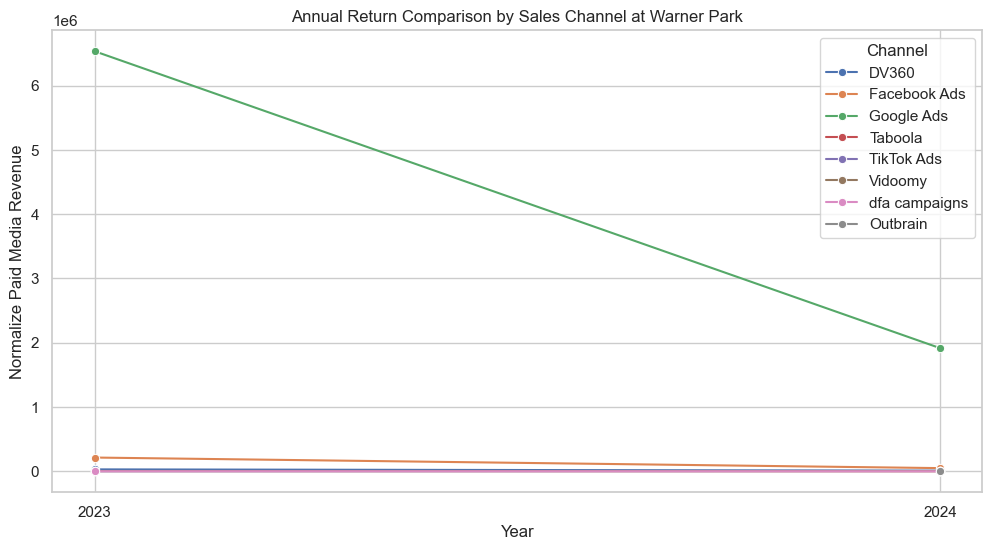

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearchannel_revenue, x='iNumYear', y='total_revenue', hue='sDesStage', marker='o')

plt.xticks(yearchannel_revenue['iNumYear'].unique().astype(int))

# Personalizar el gráfico
plt.title('Annual Return Comparison by Sales Channel at Warner Park')
plt.xlabel('Year')
plt.ylabel('Normalize Paid Media Revenue')
plt.legend(title='Channel')
plt.grid(True)
plt.show()

In [74]:
'''PRUEBA 2. Investigamos la inversión en redes y la performance en los últimos años'''
pm_historical_revenue = paidmedia_warner.groupby(['year_month', 'sDesStage']).agg(total_revenue=('mAmtNormalizedRevenue', 'sum')).reset_index()
pm_historical_revenue

KeyError: 'year_month'

Descripción de los canales de publicidad:<br>

**Google:**<br>
- DV360: Google Display & Video 360 <br>
- dfa campaigns: DFA es una solución de gestión y publicación de anuncios que ayuda a gestionar sus campañas de publicidad digital de forma integral e integrada.<br>
- Google Ads

**Facebook Ads:**<br>
- Instagram<br>
- Facebook<br>

**Tiktok Ads**<br>

**Taboola:** Taboola crea los recuadros "Around The Web" y "Recommended For You" en la parte inferior de muchas páginas web.<br>

**Vidoomy:** Empresa especializada en publicidad en video digital.<br>

**Outbrain:** Plataforma publicitaria, conocida a nivel mundial, ayuda a las marcas globales y emergentes a conectarse con los consumidores en la open web.


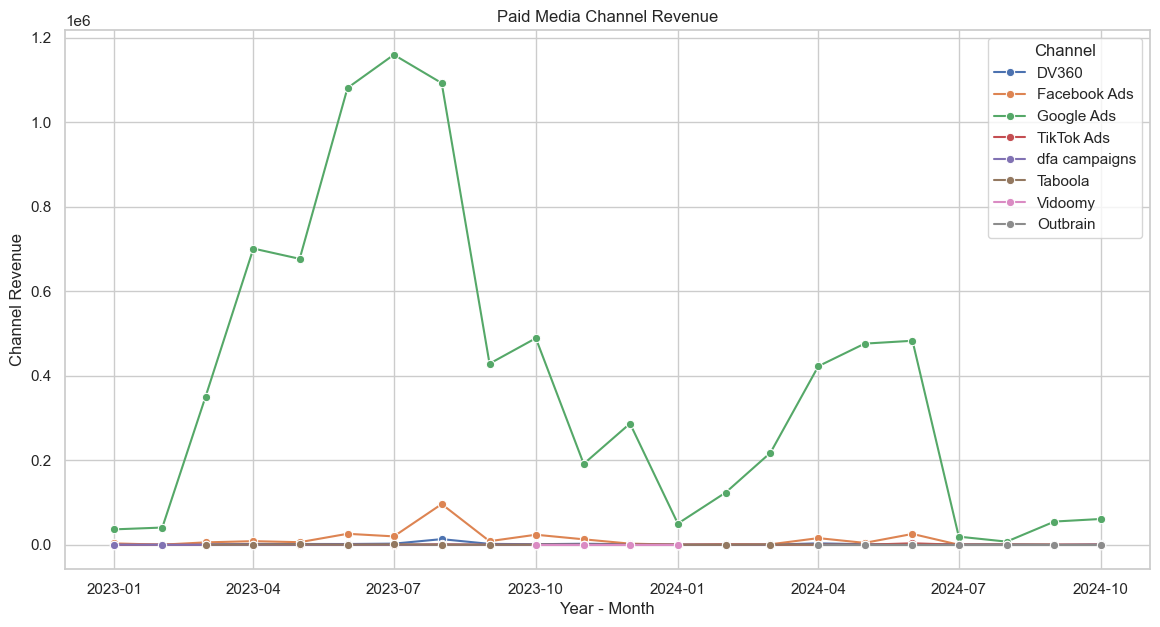

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=pm_historical_revenue, x='year_month', y='total_revenue', hue='sDesStage', marker='o')

# Personalizar el gráfico
plt.title('Paid Media Channel Revenue')
plt.xlabel('Year - Month')
plt.ylabel('Channel Revenue')
plt.legend(title='Channel')
plt.grid(True)
plt.show()

In [ ]:
'''Ahora vamos a analizar el dinero invertido a lo largo de este año, donde se ha empezado a implementar paid ads'''
'''Vamos a cambiar el número de las fechas a datetime'''

paidmedia_warner['date'] = pd.to_datetime(paidmedia_warner['iNumYear'].astype(str) + '-' + paidmedia_warner['iNumDayOfYear'].astype(str),format='%Y-%j')

In [ ]:
'''Creamos columna year/month'''
paidmedia_warner['year_month'] = paidmedia_warner['date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
'''Agrupamos año/mes y dinero invertido'''
pm_historical_spend = paidmedia_warner.groupby(['year_month', 'sDesStage']).agg(total_ad_spend=('mAmtAdSpend', 'sum')).reset_index()
pm_historical_spend

,year_month,sDesStage,total_ad_spend
0,2023-01-01,DV360,681.46
1,2023-01-01,Facebook Ads,"1,075.86"
2,2023-01-01,Google Ads,838.42
3,2023-01-01,TikTok Ads,0.00
4,2023-01-01,dfa campaigns,0.00
...,...,...,...
121,2024-10-01,DV360,"15,388.56"
122,2024-10-01,Facebook Ads,"22,009.80"
123,2024-10-01,Google Ads,"11,402.36"
124,2024-10-01,Outbrain,0.00


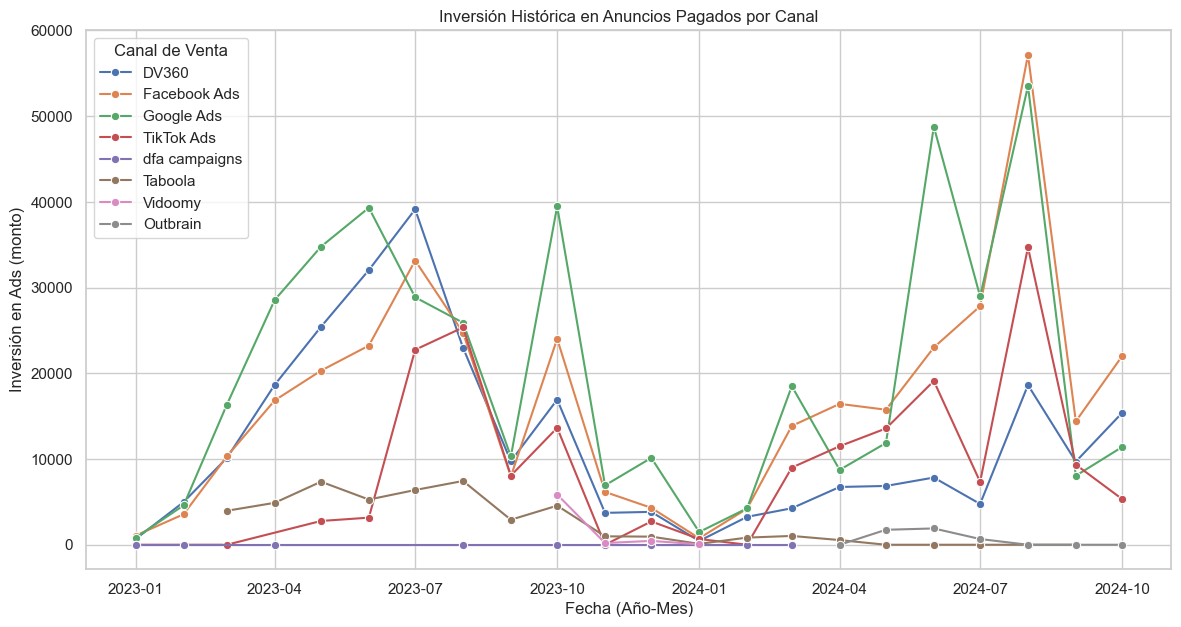

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=pm_historical_spend, x='year_month', y='total_ad_spend', hue='sDesStage', marker='o')

# Personalizar el gráfico
plt.title('Inversión Histórica en Anuncios Pagados por Canal')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Inversión en Ads (monto)')
plt.legend(title='Canal de Venta')
plt.grid(True)
plt.show()

'''Viendo que la inversión de paid ads en la Warner empezó en 2023, vamos a estudiar si el impacto en la revenue
global ha sido mayor, ya que podemos sospechar, que la inversión direccionada a Tiktok, Facebook Ads y DV360(Google) está direccionada
a una estrategia de visibilidad de marca, ya que no se ha dejado de invertir sobre todo en las estaciones fuertes del negocio, pero no ha
traído un revenue como tal. '''

In [77]:
'''Para ello vamos a filtrar el dataframe visits_cleaned y crear uno nuevo solo con los datos de la Warner'''
visits_warner = pd.read_csv('./visits_warner.csv')
visits_warner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85923 entries, 0 to 85922
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iIdSubChannel       85923 non-null  int64  
 1   sDesSubChannel      85923 non-null  object 
 2   sCodChannel         85923 non-null  int64  
 3   sDesOnline          85923 non-null  object 
 4   sDesBudget          85923 non-null  object 
 5   iIdSubPark          85923 non-null  float64
 6   sDesSubPark         85923 non-null  object 
 7   sDesCountry         85923 non-null  object 
 8   sDesRegion_correct  85923 non-null  object 
 9   sDesTypePark        85923 non-null  object 
 10  iIdCalendar         85923 non-null  float64
 11  iIdTicketType       85923 non-null  float64
 12  iIdCurrency         85923 non-null  float64
 13  iNumVisits          69634 non-null  float64
 14  mNumTicket          69633 non-null  float64
 15  mAmtRevenueTicket   85923 non-null  float64
 16  iNum

In [ ]:
'''Convertimos las columnas del nº de mes y año a númeor entero'''
visits_warner['iNumMonth'] = visits_warner['iNumMonth'].astype(int)
visits_warner['iNumYear'] = visits_warner['iNumYear'].astype(int)

In [78]:
'''Añadimos el nº de día'''
visits_warner = pd.merge(visits_warner, calendar[['iIdCalendar', 'dDate']], on='iIdCalendar', how='left')

In [81]:
'''Lo pasamos a datetime'''
visits_warner['dDate'] = pd.to_datetime(visits_warner['dDate'],format='%Y-%m-%d')

In [82]:
# Guarda el DataFrame en un archivo CSV
visits_warner.to_csv('visits_warner.csv', index=False)


In [91]:
visits_warner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85923 entries, 0 to 85922
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   iIdSubChannel       85923 non-null  int64         
 1   sDesSubChannel      85923 non-null  object        
 2   sCodChannel         85923 non-null  int64         
 3   sDesOnline          85923 non-null  object        
 4   sDesBudget          85923 non-null  object        
 5   iIdSubPark          85923 non-null  float64       
 6   sDesSubPark         85923 non-null  object        
 7   sDesCountry         85923 non-null  object        
 8   sDesRegion_correct  85923 non-null  object        
 9   sDesTypePark        85923 non-null  object        
 10  iIdCalendar         85923 non-null  float64       
 11  iIdTicketType       85923 non-null  float64       
 12  iIdCurrency         85923 non-null  float64       
 13  iNumVisits          69634 non-null  float64   

In [90]:
paidmedia_warner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iIdCalendar                 5191 non-null   int64  
 1   iIdSubpark                  5191 non-null   int64  
 2   iIdCurrency                 5191 non-null   int64  
 3   iIdStage                    5191 non-null   int64  
 4   iIdPaidMediaChannel         5191 non-null   int64  
 5   iNumImpressions             5191 non-null   int64  
 6   mAmtAdSpend                 5191 non-null   float64
 7   iNumSessions                5191 non-null   int64  
 8   iNumClicks                  5191 non-null   int64  
 9   iNumTransactions            5191 non-null   int64  
 10  iNumQuantity                5191 non-null   int64  
 11  mAmtRevenue                 5191 non-null   float64
 12  mAmtEbitda                  5191 non-null   float64
 13  iNumNewUsers                5191 

In [83]:
visits_warner['dDate']

0       2021-12-07
1       2022-06-20
2       2019-05-31
3       2024-08-19
4       2018-10-06
           ...    
85918   2018-11-02
85919   2018-07-20
85920   2024-05-02
85921   2019-03-04
85922   2021-08-27
Name: dDate, Length: 85923, dtype: datetime64[ns]

In [ ]:
visits_pm_warner = visits_warner.merge(visits_warner, paidmedia_warner, on='iIdCalendar', how='left')
visits_pm_warner

,iIdSubChannel,sDesSubChannel,sCodChannel,sDesOnline,sDesBudget,iIdSubPark,sDesSubPark_x,sDesCountry,sDesRegion_correct,sDesTypePark,...,sCodStage,sDesStage,sCodPaidMediaChannel,sDesPaidMediaChannel,sDesSubPark_y,iNumYear_y,sDesMonth_y,iNumMonth_y,sDayWeek_y,iNumDayOfYear
0,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,OUTBRAIN,Outbrain,NATIVE,Native,Warner,"2,024.00",August,8.00,Monday,232.00
4,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,GOOGLEADS,Google Ads,VIDEO,Video,Warner,"2,024.00",August,8.00,Monday,232.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266727,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,TIKTOKADS,TikTok Ads,SOCIALPAID,Social Paid,Warner,"2,024.00",May,5.00,Thursday,123.00
266728,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,FACEBOOKADS,Facebook Ads,REFERRAL,Referral,Warner,"2,024.00",May,5.00,Thursday,123.00
266729,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,FACEBOOKADS,Facebook Ads,SOCIALPAID,Social Paid,Warner,"2,024.00",May,5.00,Thursday,123.00
266730,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
visits_paidmedia_warner.to_csv('visits_paidmedia_warner.csv', index=False)

In [86]:
visits_pm_warner

,iIdSubChannel,sDesSubChannel,sCodChannel,sDesOnline,sDesBudget,iIdSubPark,sDesSubPark_x,sDesCountry,sDesRegion_correct,sDesTypePark,...,sCodStage,sDesStage,sCodPaidMediaChannel,sDesPaidMediaChannel,sDesSubPark_y,iNumYear_y,sDesMonth_y,iNumMonth_y,sDayWeek_y,iNumDayOfYear
0,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,OUTBRAIN,Outbrain,NATIVE,Native,Warner,"2,024.00",August,8.00,Monday,232.00
4,101,Main Gate Full Price,1,Off-line,Main Gate Full Price,29.00,Warner,Spain,EUR,Amusement Parks,...,GOOGLEADS,Google Ads,VIDEO,Video,Warner,"2,024.00",August,8.00,Monday,232.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266727,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,TIKTOKADS,TikTok Ads,SOCIALPAID,Social Paid,Warner,"2,024.00",May,5.00,Thursday,123.00
266728,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,FACEBOOKADS,Facebook Ads,REFERRAL,Referral,Warner,"2,024.00",May,5.00,Thursday,123.00
266729,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,FACEBOOKADS,Facebook Ads,SOCIALPAID,Social Paid,Warner,"2,024.00",May,5.00,Thursday,123.00
266730,420,Annual Pass Complements - Basic,4,Off-line,Annual Pass Complements,29.00,Warner,Spain,EUR,Amusement Parks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pm_investiment_revenue = visits_pm_warner[visits_pm_warner['sDesOnline'] == 'On-line']

In [ ]:
pm_investiment_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116357 entries, 14744 to 264450
Data columns (total 59 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   iIdSubChannel               116357 non-null  int64         
 1   sDesSubChannel              116357 non-null  object        
 2   sCodChannel                 116357 non-null  int64         
 3   sDesOnline                  116357 non-null  object        
 4   sDesBudget                  116357 non-null  object        
 5   iIdSubPark                  116357 non-null  float64       
 6   sDesSubPark_x               116357 non-null  object        
 7   sDesCountry                 116357 non-null  object        
 8   sDesRegion_correct          116357 non-null  object        
 9   sDesTypePark                116357 non-null  object        
 10  iIdCalendar                 116357 non-null  float64       
 11  iIdTicketType               116357 non-n

In [ ]:
pm_investiment_revenue['sDesOnline'].unique()

array(['On-line'], dtype=object)

In [ ]:
pm_investiment_revenue = (
    pm_investiment_revenue.groupby(pm_investiment_revenue['dDate'].dt.to_period('M'))
    .agg(revenue_ticket=('mAmtRevenueTicket', 'sum'), total_ad_spend=('mAmtAdSpend', 'sum'))
    .reset_index()
)

In [ ]:
pm_investiment_revenue['dDate']

0     2018-01
1     2018-02
2     2018-03
3     2018-04
4     2018-05
       ...   
79    2024-08
80    2024-09
81    2024-10
82    2024-11
83    2024-12
Name: dDate, Length: 84, dtype: period[M]

In [ ]:
pm_investiment_revenue.head()

,dDate,revenue_ticket,total_ad_spend
0,2018-01,"142,687.31",0.00
1,2018-02,"36,221.49",0.00
2,2018-03,"548,885.42",0.00
3,2018-04,"643,673.38",0.00
4,2018-05,"825,129.36",0.00


In [ ]:
pm_investiment_revenue['dDate2'] = pm_investiment_revenue['dDate'].dt.to_timestamp()

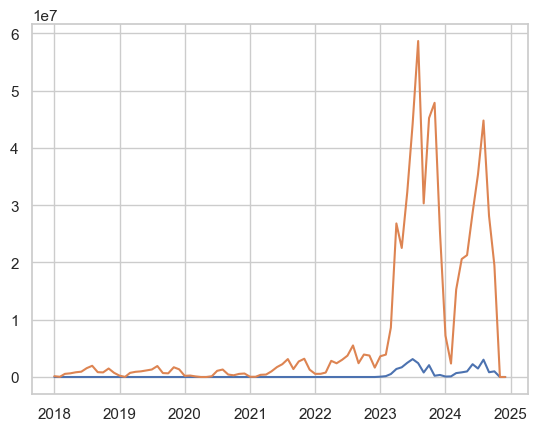

In [ ]:
plt.plot(pm_investiment_revenue['dDate2'], pm_investiment_revenue['total_ad_spend'])
plt.plot(pm_investiment_revenue['dDate2'], pm_investiment_revenue['revenue_ticket'])

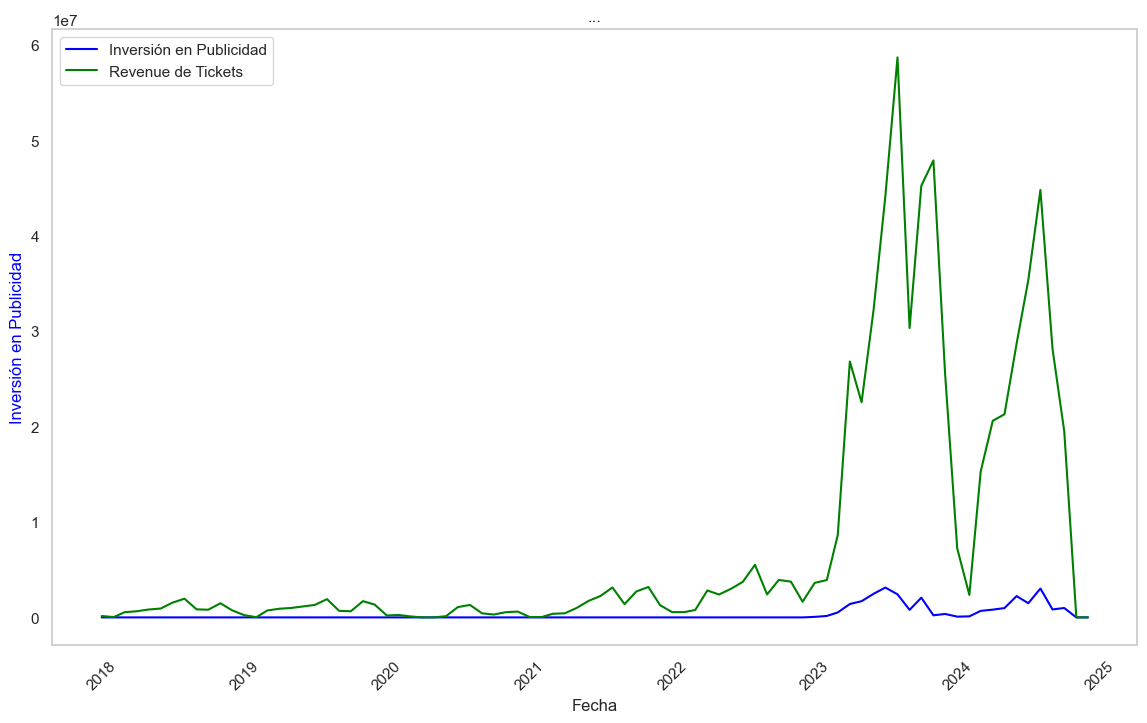

In [ ]:
# Crear la figura y el eje para el gráfico
plt.figure(figsize=(14, 8))

# Línea para el dinero invertido en publicidad
plt.plot(pm_investiment_revenue['dDate2'], pm_investiment_revenue['total_ad_spend'], color='blue', label='Inversión en Publicidad')
plt.plot(pm_investiment_revenue['dDate2'], pm_investiment_revenue['revenue_ticket'], color='green', label='Revenue de Tickets')
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Inversión en Publicidad", color='blue')
plt.legend(loc="upper left")

plt.grid(False)

# Crear un segundo eje Y para el revenue de tickets
#ax2 = plt.gca().twinx()
#ax2.plot(pm_investiment_revenue['dDate2'], pm_investiment_revenue['revenue_ticket'], color='green', label='Revenue de Tickets')
#ax2.set_ylabel("Revenue de Tickets", color='green')
#ax2.legend(loc="upper right")

plt.grid(False)

# Mostrar el título y el gráfico
plt.title("...")
plt.show()

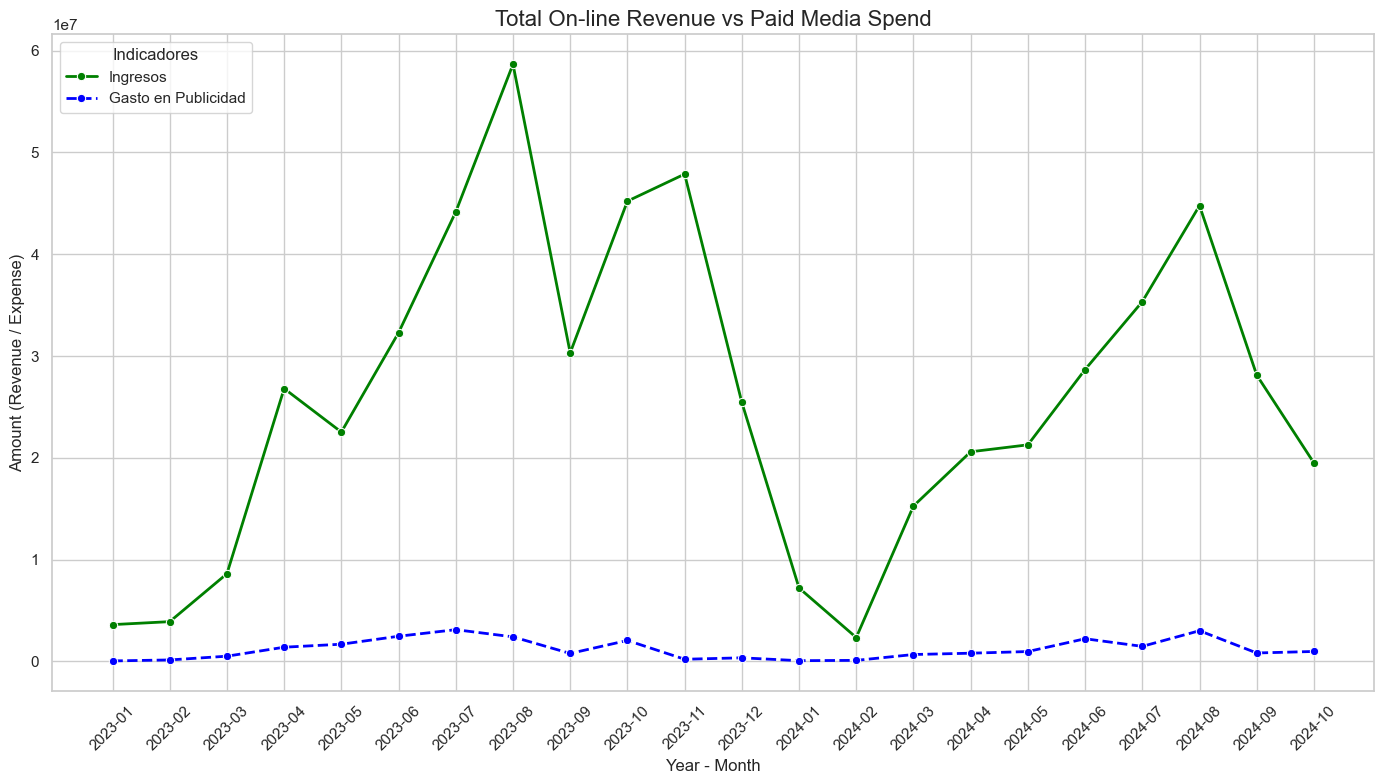

In [ ]:
plt.figure(figsize=(14, 8))

# Graficar los ingresos con línea sólida
sns.lineplot(data=monthly_data, x='year_month', y='mAmtRevenueTicket', marker='o', label="Ingresos", color='green', linewidth=2)

# Graficar el gasto en publicidad con línea discontinua
sns.lineplot(data=monthly_data, x='year_month', y='mAmtAdSpend', marker='o', label="Gasto en Publicidad", color='blue', linestyle='--', linewidth=2)

# Personalizar el gráfico
plt.title("Total On-line Revenue vs Paid Media Spend", fontsize=16)
plt.xlabel("Year - Month", fontsize=12)
plt.ylabel("Amount (Revenue / Expense)", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.legend(title='Indicadores', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

12. **Seasonal Variation in Channel Effectiveness for Online Sales:** <br>
Hypothesis: The effectiveness of certain channels (e.g., social media vs. organic search) varies by season, with organic channels performing better during peak season as visitors are more likely to search independently.

In [ ]:
'''Vamos a valorar solo el revenue de compras On-line y los picos de inversión en Ads para por channels'''
warner_online_sales = pd.read_csv('./online_visits_pm.csv')
warner_pm_os = warner_online_sales[['iIdCalendar', 'sDesTicketType', 'mAmtRevenueTicket', 'iNumYear_x', 
                                    'sDesMonth_x', 'iNumMonth_x', 'PromotionCategory', 'iNumDayOfYear_x', 
                                    'iNumImpressions', 'mAmtAdSpend', 'iNumClicks', 'iNumTransactions',
                                    'mAmtNormalizedRevenue', 'sDesStage', 'sDesPaidMediaChannel']]

In [ ]:
warner_pm_os.to_csv('./warner_pm_os.csv', index=False)
warner_pm_os = pd.read_csv('./warner_pm_os.csv')
warner_pm_os

,iIdCalendar,sDesTicketType,mAmtRevenueTicket,iNumYear,sDesMonth,iNumMonth,PromotionCategory,iNumDayOfYear,iNumImpressions,mAmtAdSpend,iNumClicks,iNumTransactions,mAmtNormalizedRevenue,sDesStage,sDesPaidMediaChannel,ROI
0,1970-01-01 00:00:00.020230611,CHILD,"3,682.98",2023,June,6,Promotions,162,357912,809.61,1892,1,58.95,DV360,Display,0.07
1,1970-01-01 00:00:00.020230611,CHILD,"3,682.98",2023,June,6,Promotions,162,660410,174.63,529,0,0.00,Taboola,Native,0.00
2,1970-01-01 00:00:00.020230611,CHILD,"3,682.98",2023,June,6,Promotions,162,70749,251.02,370,0,NaN,Google Ads,Video,NaN
3,1970-01-01 00:00:00.020230611,CHILD,"3,682.98",2023,June,6,Promotions,162,87199,276.56,679,0,0.00,Google Ads,Display,0.00
4,1970-01-01 00:00:00.020230611,CHILD,"3,682.98",2023,June,6,Promotions,162,5809,310.13,513,3,347.96,Google Ads,Non-Brand Paid Search,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92178,1970-01-01 00:00:00.020230312,ADULT,"1,404.12",2023,March,3,Annual Pass,71,0,0.00,0,0,0.00,Google Ads,Display,NaN
92179,1970-01-01 00:00:00.020230312,ADULT,"1,404.12",2023,March,3,Annual Pass,71,0,0.00,0,0,0.00,Facebook Ads,Referral,NaN
92180,1970-01-01 00:00:00.020230312,ADULT,"1,404.12",2023,March,3,Annual Pass,71,371930,367.39,521,1,106.99,Facebook Ads,Social Paid,0.29
92181,1970-01-01 00:00:00.020230312,ADULT,"1,404.12",2023,March,3,Annual Pass,71,7719,338.22,3820,51,"6,180.92",Google Ads,Brand Paid Search,18.27


Calcular ROI (Retorno de Inversión): Retorno de inversión como ROI = total_revenue / total_ad_spend para ver la efectividad del gasto publicitario.

In [ ]:
warner_pm_os['ROI'] = warner_pm_os['mAmtNormalizedRevenue'] / warner_pm_os['mAmtAdSpend']

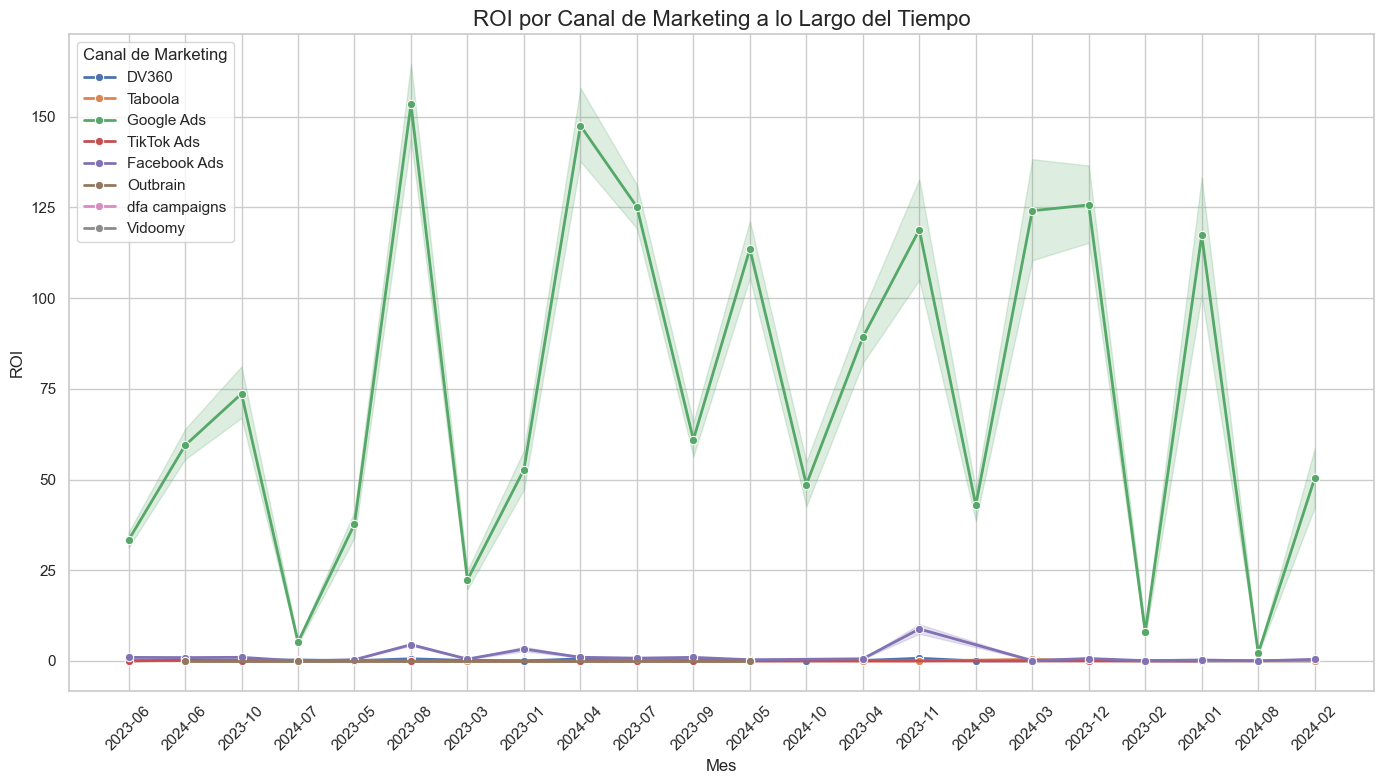

In [ ]:
plt.figure(figsize=(14, 8))
xsns.lineplot(data=warner_pm_os, x='year_month', y='ROI', hue='sDesStage', marker='o', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title("ROI por Canal de Marketing a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("ROI", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Canal de Marketing', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Crear una nueva columna 'year_month' combinando 'iNumYear' y 'iNumMonth'
warner_pm_os['year_month'] = warner_pm_os['iNumYear'].astype(str) + '-' + warner_pm_os['iNumMonth'].astype(str).str.zfill(2)
monthly_data = warner_pm_os.groupby('year_month')[['mAmtRevenueTicket', 'mAmtAdSpend']].sum().reset_index()


13. **Voucher and Discount Influence on Visitor Volume and Revenue:** <br>
Hypothesis: Vouchers and discounts significantly increase ticket sales volume but may decrease average revenue per visitor if heavily relied upon.

14. **Channel-Specific Performance in Driving Revenue for Different Ticket Types:** <br>
Hypothesis: Certain channels are more effective for selling specific ticket types, such as social media channels boosting single-day ticket sales, while email marketing campaigns encourage purchases of multi-day or annual passes.

15. **Customer Behavior on Weekdays vs. Weekends in Online Purchases:** <br>
Hypothesis: Online ticket sales volume increases during weekends.

16. **Product Bundling and Its Effect on Cross-Selling Success:** <br>
Hypothesis: Product bundles (e.g., tickets + meals or merchandise) increase the likelihood of cross-selling success, leading to a higher average revenue per transaction.

17. **Effectiveness of Organic vs. Paid Marketing Channels Post-COVID:** <br>
Hypothesis: Post-COVID, organic channels (like direct website traffic) have become more effective for ticket sales as visitors may directly search for tickets or use apps for convenience.

In [ ]:
onlinesells_lines = pd.read_csv('Data/paid_media_online_sells/lines_online_sells/fact_vector_lines.csv')
onlinesells_lines

This is the central Data Frame:


/var/folders/fp/1z3b5cy15gg6y5646dztcdfm0000gn/T/ipykernel_14347/1500517107.py:2: DtypeWarning: Columns (0,3,28,29,34,35,40) have mixed types. Specify dtype option on import or set low_memory=False.
  onlinesells_lines = pd.read_csv('Data/paid_media_online_sells/lines_online_sells/fact_vector_lines.csv')


,sCodTransactionCode,iIdTransactionDate,iIdTransactionHour,sCodEANCode,iIdSubPark,iIdProductVector,bIndValid,sDesInvalid,iIdInvalidDate,mAmtFinalPrice,...,sDesDiscountType,bIndGiftCheck,iIdExpiritingDate,iIdDiscount,sCodSplitPayment,mAmtDiscountMemberShip,sDesLOQ,sDesSource,dLoad,dUpdate
0,02e79f56-2fb3-468a-a876-dc23676c125f,20240831,120000,NaN,29,9289,True,NaN,-1,89.90,...,NaN,NaN,-1,-1,NaN,NaN,Platinum,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
1,02e79f56-2fb3-468a-a876-dc23676c125f,20240831,120000,NaN,29,9289,True,NaN,-1,89.90,...,NaN,NaN,-1,-1,NaN,NaN,Platinum,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
2,02e79f56-2fb3-468a-a876-dc23676c125f,20240831,120000,NaN,29,9289,True,NaN,-1,89.90,...,NaN,NaN,-1,-1,NaN,NaN,Platinum,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
3,02e79f56-2fb3-468a-a876-dc23676c125f,20240831,120000,NaN,29,9289,True,NaN,-1,89.90,...,NaN,NaN,-1,-1,NaN,NaN,Platinum,Loq,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
4,0b60e605-9145-416a-9350-e2105ee973c8,20241013,10000,NaN,29,9289,True,NaN,-1,79.90,...,NaN,NaN,-1,-1,NaN,NaN,Platinum,Loq,2024-10-14T14:20:24.000Z,2024-10-14T14:20:24.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371860,1251042501,20240309,90000,28150210300133770933,64,23669,True,NaN,-1,26.00,...,NEW,False,-1,-1,0.00,0.00,NaN,Vector,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
8371861,1297714001,20240518,40000,28150300300145367770,64,2360,True,NaN,-1,34.74,...,NEW,False,-1,-1,0.00,0.00,NaN,Vector,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
8371862,1300385401,20240521,120000,28150300300146002066,64,43245,True,NaN,-1,34.74,...,NEW,False,20240530,266582,0.00,0.00,NaN,Vector,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z
8371863,1436011201,20240801,40000,28150300300167793122,64,43245,True,NaN,-1,31.85,...,NEW,False,20250106,-1,0.00,0.00,NaN,Vector,2024-09-03T07:06:49.000Z,2024-09-03T07:06:49.000Z


### Fourth Data Frame: **<u> Paid Media </u>** <br>

18. **Correlation Between Ad Spend and Revenue Across Channels:** <br>
Hypothesis: Higher ad spend on certain channels (e.g., Google, TikTok) generates a greater revenue return, with some channels delivering a better return on ad spend (ROAS) than others.

19. **Impressions and Click-Through Rates (CTR) by Channel Type:** <br>
Hypothesis: Social media channels (e.g., TikTok, Instagram) yield higher CTRs compared to search engines (e.g., Google), as they may drive more engagement-focused interactions.


20. **Channel-Specific Cost Per Acquisition (CPA) and Conversion Efficiency:** <br>
Hypothesis: Certain channels have a lower CPA, making them more efficient in driving transactions, especially during promotional campaigns.

21. **Impact of New User Acquisition on Revenue Growth by Channel:** <br>
Hypothesis: Channels like TikTok and Instagram are more effective at attracting new users compared to more established channels like Google Ads, contributing significantly to user base growth.


22. **Seasonal Variability in Paid Media Performance:** <br>
Hypothesis: Paid media performance (e.g., CTR, CPA, and ROAS) fluctuates significantly across seasons, with higher ad efficiency during peak visitor seasons.

23. **Comparison of Channel Revenue Contribution by Impressions and Sessions:** <br>
Hypothesis: Channels with higher impressions also generate the most sessions, but not necessarily the highest revenue, suggesting a potential gap between visibility, brand awareness and conversion.

24. **Click-to-Transaction Conversion Rates by Ad Channel:** <br>
Hypothesis: Channels like Google Ads have higher click-to-transaction conversion rates compared to social media platforms, where users may interact with content but convert less frequently.

25. **Effect of Paid Channel Mix on Revenue Growth:** <br>
Hypothesis: A diversified paid media strategy that balances social media and search ads results in higher revenue growth compared to reliance on a single type of channel.

### **<u>Global Hypothesis</u>**

1. **Multi-Channel Integration Enhances Visitor Conversion and Revenue.**

2. **Seasonal Promotions Amplify Revenue Across Online Sales and Paid Media.**

3. **Social Media’s Role in Attracting New Users and Boosting Brand Visibility.**

4. **Product Bundling as a Strategy to Drive Higher Revenue Per Transaction.**

5. **Investment in increasing the digitization of the parks yields more money.**

6. **Influence of Paid Media on Daily Visitor Volume and Revenue Peaks.**


7. **Conversion Rate Differentiation Between Organic and Paid Traffic on Online Sales.** <br>
Hypothesis: Organic channels drive higher conversion rates on online sales than paid channels, as organically driven visitors are likely more intent on visiting the park.

8. **Optimal Paid Media Channel Mix for Driving Different Ticket Types.** <br>
Hypothesis: Different paid media channels are more effective in promoting specific ticket types.

9. **Seasonal Variation in Visitor Demographics Influencing Online Sales Channel Success.** <br>
Hypothesis: Visitor vary seasonally, impacting the success of specific online sales channels and influencing demand for certain ticket types.